# Contents :
**Part 0 : Environment Setup**
 - <a href="#C1">Importation of libraries</a>
 - <a href="#C2">Definition of functions</a>
 - <a href="#C3">Dataset Import</a>
 
**Part 1 : Data Overview and Cleaning**
 - <a href="#C4">Analysis of the 5 files</a>
 - <a href="#C5">Files Comparaison</a>

**Part 2 : Data Pre-exploratory**
 - <a href="#C6">Indicators selection (missing values)</a>
 - <a href="#C7">Countries selection</a>
 - <a href="#C8">Indicators selection (relevance to the problematic)</a>
 - <a href="#C9">Selection of most 3-4 relevant indicators</a>
 
**Part 3 : Conclusions**
 - <a href="#C10">Indicators' order of magnitude</a>
 - <a href="#C11">Countries with high potential</a>

# Part 0 : Environment Setup

# <a name="C1">Importation of libraries</a>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
import statsmodels.api as sm
import scipy.stats as st

C:\Users\najwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\najwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Making adjustements
pd.set_option("display.max_columns", 500)
pd.set_option("max_colwidth", 500)
pd.set_option('display.max_rows', 500)

In [3]:
# Displaying versions of libraries
print("pandas version : " + pd.__version__)
print("numpy version : " + np.__version__)
print("matplotlib version : " + mp.__version__)
print("seaborn version : " + sns.__version__)

pandas version : 1.4.2
numpy version : 1.21.5
matplotlib version : 3.5.1
seaborn version : 0.11.2


# <a name="C2">Definition of functions</a>

In [4]:
def graphe(indicateur):
    '''Function that shows how an indicator evolves with time - 2000 to 2014'''

    mask = (data["Indicator Code"]==indicateur)
    data_selection = data[mask]
    
    indicateur_nom = data_selection["Indicator Name"].iloc[0]
    indicateur_code = data_selection["Indicator Code"].iloc[0]

    fig, ax = plt.subplots(figsize=(20, 10))
    plt.title("Evolution of : "+ " [" + indicateur_code + "] \n"+indicateur_nom , fontsize=25)
    plt.xlabel("Years", fontsize=15)
    plt.ylabel("Indicator Value", fontsize=15)
    plt.xticks(rotation=30)

    annees=[]
    for annee in list(data_selection.loc[:,"2000":"2014"]):
        if data_selection.count()[annee] != 0:
            annees.append(annee)
            
    for index, raw in data_selection.iterrows():
        indicateur_annees = []
        indicateur_valeurs = []
        for annee in annees:
            indicateur_annees.append(annee)
            indicateur_valeurs.append(raw[annee])
        plot = ax.plot(indicateur_annees, indicateur_valeurs,'-o')

In [5]:
def graphe_proj(indicateur):
    '''Function that shows how an indicator evolves with time - 2015 to 2100'''

    mask = (data_proj["Indicator Code"]==indicateur)
    data_selection = data_proj[mask]
    
    indicateur_nom = data_selection["Indicator Name"].iloc[0]
    indicateur_code = data_selection["Indicator Code"].iloc[0]

    fig, ax = plt.subplots(figsize=(20, 10))
    plt.title("Evolution Forecast of : "+ " [" + indicateur_code + "] \n"+indicateur_nom , fontsize=25)
    plt.xlabel("Years", fontsize=15)
    plt.ylabel("Indicator Value", fontsize=15)
    plt.xticks(rotation=30)

    annees=[]
    for annee in list(data_selection.loc[:,"2015":"2100"]):
        if data_selection.count()[annee] != 0: 
             annees.append(annee)

    legends=[]
    for index, raw in data_selection.iterrows():
        legends.append(raw["Country Name"])
        indicateur_annees = []
        indicateur_valeurs = []
        for annee in annees:
            indicateur_annees.append(annee)
            indicateur_valeurs.append(raw[annee])

        plot = ax.plot(indicateur_annees, indicateur_valeurs,'-o')
    plt.legend(legends)

In [6]:
def correlation_period(indicateur1, indicateur2):
    '''Function that shows the correlation between 2 indicators - 2000 to 2014'''
    
    mask1 = (data["Indicator Code"]==indicateur1)
    mask2 = (data["Indicator Code"]==indicateur2)
    data_selection1 = data[mask1]
    data_selection2 = data[mask2]
    
    indicateur1_nom = data_selection1["Indicator Code"].iloc[0]
    indicateur2_nom = data_selection2["Indicator Code"].iloc[0]

    plt.figure(figsize=(15,8))
    plt.title("Correlation between : "+ " " + indicateur1_nom+ " et \n"+indicateur2_nom , fontsize=25)
    plt.xlabel(indicateur1_nom, fontsize=15)
    plt.ylabel(indicateur2_nom, fontsize=15)
    
    plt.plot(data_selection1['2000-2014'],data_selection2['2000-2014'], "o")
    plt.show()
    
    print(st.pearsonr(data_selection1['2000-2014'],data_selection2['2000-2014'])[0])
    print(np.cov(data_selection1['2000-2014'],data_selection2['2000-2014'],ddof=0)[1,0])

In [7]:
def correlation_2014(indicateur1, indicateur2):
    '''Function that shows the correlation between 2 indicators in 2014 only'''

    mask1 = (data["Indicator Code"]==indicateur1)
    mask2 = (data["Indicator Code"]==indicateur2)
    data_selection1 = data[mask1]
    data_selection2 = data[mask2]
    
    indicateur1_nom = data_selection1["Indicator Code"].iloc[0]
    indicateur2_nom = data_selection2["Indicator Code"].iloc[0]

    plt.figure(figsize=(15,8))
    plt.title("Correlation between : "+ " " + indicateur1_nom+ " et \n"+indicateur2_nom , fontsize=10)
    plt.xlabel(indicateur1_nom, fontsize=10)
    plt.ylabel(indicateur2_nom, fontsize=10)
    
    plt.plot(data_selection1['2014'],data_selection2['2014'], "o")
    plt.show()
    
    #print(st.pearsonr(data_selection1['2014'],data_selection2['2014'])[0])
    #print(np.cov(data_selection1['2014'],data_selection2['2014'],ddof=0)[1,0])

# <a name="C3">Dataset Import</a>

In [8]:
# Importing the 5 files
PATH = ""
country = pd.read_csv(PATH+'EdStatsCountry.csv')
country_series = pd.read_csv(PATH+'EdStatsCountry-Series.csv')
data = pd.read_csv(PATH+'EdStatsData.csv')
footnote = pd.read_csv(PATH+'EdStatsFootNote.csv')
series = pd.read_csv(PATH+'EdStatsSeries.csv')

In [9]:
# Copying these files, if needed
country_or = country.copy() 
country_series_or = country_series.copy()
data_or = data.copy()
footnote_or = footnote.copy()
series_or = series.copy()

In [10]:
# Listing files
df_liste = [country, country_series, data, footnote, series]
df_noms= ['country', 'country_series', 'data', 'footnote', 'series']

# Part 1 : Data Overview and Cleaning

# <a name="C4">Analysis of the 5 files</a>

In [11]:
# Displaying first 2 lines of each file
for df, nom in zip(df_liste, df_noms):
    print(nom, ':')
    display(df.head(2))
    print('\n')

country :


Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   

                                                                                                                                                                                                                                       Special Notes  \
0                                                                                                      SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.   
1  Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.   

                      Region          Income Group WB-2 code  \
0  Latin America & Caribbean  High income: nonOECD        AW   
1                 South Asia            Low income        AF   

  National accounts base year  National accounts reference year  \
0                        2000                               NaN   
1                     2002/03                               NaN   

                 SNA price valuation Lending category Other groups  \
0  Value added at basic prices (VAB)              NaN          NaN   
1  Value added at basic prices (VAB)              IDA         HIPC   

                                      System of National Accounts  \
0  Country uses the 1993 System of National Accounts methodology.   
1  Country uses the 1993 System of National Accounts methodology.   

  Alternative conversion factor PPP survey year  \
0                           NaN             NaN   
1                           NaN             NaN   

              Balance of Payments Manual in use  \
0  IMF Balance of Payments Manual, 6th edition.   
1                                           NaN   

  External debt Reporting status       System of trade  \
0                            NaN  Special trade system   
1                         Actual  General trade system   

     Government Accounting concept           IMF data dissemination standard  \
0                              NaN                                       NaN   
1  Consolidated central government  General Data Dissemination System (GDDS)   

  Latest population census                            Latest household survey  \
0                     2010                                                NaN   
1                     1979  Multiple Indicator Cluster Survey (MICS), 2010/11   

  Source of most recent Income and expenditure data  \
0                                               NaN   
1           Integrated household survey (IHS), 2008   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   

   Latest industrial data  Latest trade data Latest water withdrawal data  \
0                     NaN             2012.0                          NaN   
1                     NaN             2012.0                         2000   

   Unnamed: 31  
0          NaN  
1          NaN



country_series :


CountryCode   SeriesCode  \
0         ABW  SP.POP.TOTL   
1         ABW  SP.POP.GROW   

                                                DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population Prospects         NaN  
1   Data sources: United Nations World Population Prospects         NaN



data :


Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   

                                                 Indicator Name  \
0  Adjusted net enrolment rate, lower secondary, both sexes (%)   
1      Adjusted net enrolment rate, lower secondary, female (%)   

  Indicator Code  1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  \
0     UIS.NERA.2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   UIS.NERA.2.F   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2016  2017  2020  2025  2030  2035  2040  2045  2050  2055  2060  2065  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN



footnote :


CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN



series :


Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   

                                                           Indicator Name  \
0  Barro-Lee: Percentage of female population age 15-19 with no education   
1         Barro-Lee: Percentage of population age 15-19 with no education   

                                              Short definition  \
0  Percentage of female population age 15-19 with no education   
1         Percentage of population age 15-19 with no education   

                                               Long definition  \
0  Percentage of female population age 15-19 with no education   
1         Percentage of population age 15-19 with no education   

   Unit of measure Periodicity Base Period Other notes Aggregation method  \
0              NaN         NaN         NaN         NaN                NaN   
1              NaN         NaN         NaN         NaN                NaN   

  Limitations and exceptions  Notes from original source General comments  \
0                        NaN                         NaN              NaN   
1                        NaN                         NaN              NaN   

                                                       Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   
1  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   

  Related source links  Other web links  Related indicators  License Type  \
0                  NaN              NaN                 NaN           NaN   
1                  NaN              NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN

In [12]:
# Displaying shape of each file
for df, nom in zip(df_liste, df_noms):
    print(nom, ':', df.shape)

country : (241, 32)
country_series : (613, 4)
data : (886930, 70)
footnote : (643638, 5)
series : (3665, 21)


In [13]:
# Displaying columns, type, nb of NaN, of each file
for df, nom in zip(df_liste, df_noms):
    print(nom, ':')
    display(df.info())

country :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   

None

country_series :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


None

data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  198

None

footnote :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


None

series :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original s

None

In [14]:
# Removing useless columns - no value, of each file
country.drop('Unnamed: 31',axis=1, inplace=True)
country_series.drop('Unnamed: 3',axis=1, inplace=True)
data.drop('Unnamed: 69',axis=1, inplace=True)
footnote.drop('Unnamed: 4',axis=1, inplace=True)
series.drop(['Unit of measure','Notes from original source','Other web links','Related indicators','License Type','Unnamed: 20'],axis=1, inplace=True)

In [15]:
# Searching for duplicates overall
for df, nom in zip(df_liste, df_noms):
    print(nom, df.duplicated().sum())

country 0
country_series 0
data 0
footnote 0
series 0


In [16]:
# Searching for duplicates using a specific key(s)
print(df_noms[0], ':', df_liste[0].duplicated(subset=['Country Code']).sum())

print(df_noms[1], ':', df_liste[1].duplicated(subset=['CountryCode','SeriesCode']).sum())

print(df_noms[2], ':', df_liste[2].duplicated(subset=['Country Name','Indicator Name']).sum())

print(df_noms[3], ':', df_liste[3].duplicated(subset=['CountryCode','SeriesCode','Year']).sum())

print(df_noms[4], ':', df_liste[4].duplicated(subset=['Series Code']).sum())

country : 0
country_series : 0
data : 0
footnote : 0
series : 0


In [17]:
# Displaying % of NaN for each file
for df, nom in zip(df_liste, df_noms):
    print(nom, ':')
    display(df.isna().mean())

country :


Country Code                                         0.000000
Short Name                                           0.000000
Table Name                                           0.000000
Long Name                                            0.000000
2-alpha code                                         0.012448
Currency Unit                                        0.107884
Special Notes                                        0.398340
Region                                               0.112033
Income Group                                         0.112033
WB-2 code                                            0.004149
National accounts base year                          0.149378
National accounts reference year                     0.867220
SNA price valuation                                  0.182573
Lending category                                     0.402490
Other groups                                         0.759336
System of National Accounts                          0.107884
Alternat

country_series :


CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
dtype: float64

data :


Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.918496
1971              0.959933
1972              0.959840
1973              0.959924
1974              0.959715
1975              0.901564
1976              0.957738
1977              0.957636
1978              0.957634
1979              0.958498
1980              0.899516
1981              0.956280
1982              0.957707
1983              0.956637
1984              0.956472
1985              0.898193
1986              0.955609
1987              0.956433
1988              0.956533
1989              0.957674
1990              0.859735
1991              0.916073
1992              0.914826
1993              0.914545
1994              0.912663
1995              0.851892
1996              0.913401
1997              0.917183
1998              0.904261
1999              0.866011
2000              0.800801
2001              0.860745
2002              0.859961
2

footnote :


CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
dtype: float64

series :


Series Code                            0.000000
Topic                                  0.000000
Indicator Name                         0.000000
Short definition                       0.411733
Long definition                        0.000000
Periodicity                            0.972988
Base Period                            0.914325
Other notes                            0.849386
Aggregation method                     0.987176
Limitations and exceptions             0.996180
General comments                       0.996180
Source                                 0.000000
Statistical concept and methodology    0.993724
Development relevance                  0.999181
Related source links                   0.941337
dtype: float64

In [18]:
# Understanging file country - "Country" and "Region" columns are critical - let's iunderstand their NaNs
country_noregion = country.loc[country['Region'].isna(),'Short Name']
country_noregion

5                                          Arab World
57              East Asia & Pacific (developing only)
58            East Asia & Pacific (all income levels)
59            Europe & Central Asia (developing only)
60          Europe & Central Asia (all income levels)
63                                          Euro area
68                                     European Union
78                                          Gibraltar
89                                        High income
92             Heavily indebted poor countries (HIPC)
116       Latin America & Caribbean (developing only)
122     Latin America & Caribbean (all income levels)
123      Least developed countries: UN classification
124                                        Low income
127                               Lower middle income
128                               Low & middle income
140    Middle East & North Africa (all income levels)
143                                     Middle income
148      Middle East & North

In [19]:
# File country - Removing "countries" being either regions or too small
country = country.loc[-country['Region'].isna()]
country.shape

(214, 31)

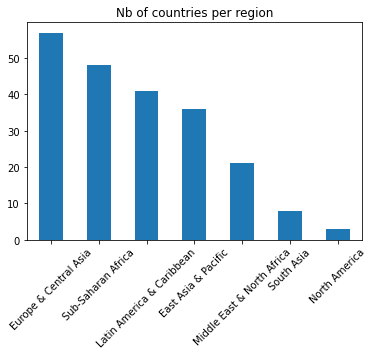

In [20]:
# File country - Dispalying nb of countries by region
country["Region"].value_counts().plot(kind='bar')
plt.title('Nb of countries per region')
plt.xticks(rotation = 45)
plt.show()

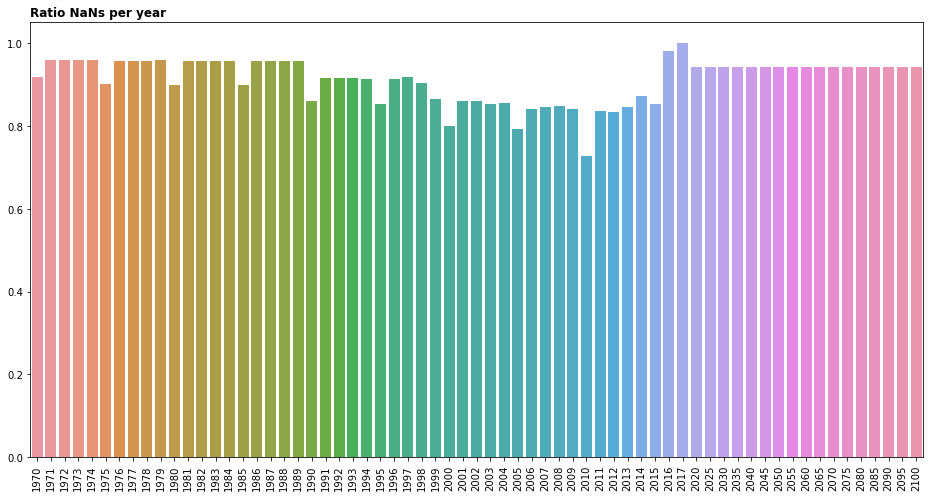

In [21]:
# File data - Dispalying % of NaNs per year
plt.figure(figsize = (16,8))
sns.barplot(x=data.iloc[:,4:].isna().mean().index, y = data.iloc[:,4:].isna().mean())
plt.xticks(rotation = 90)
plt.title('Ratio NaNs per year', fontweight = 'bold', loc = 'left')
plt.show()

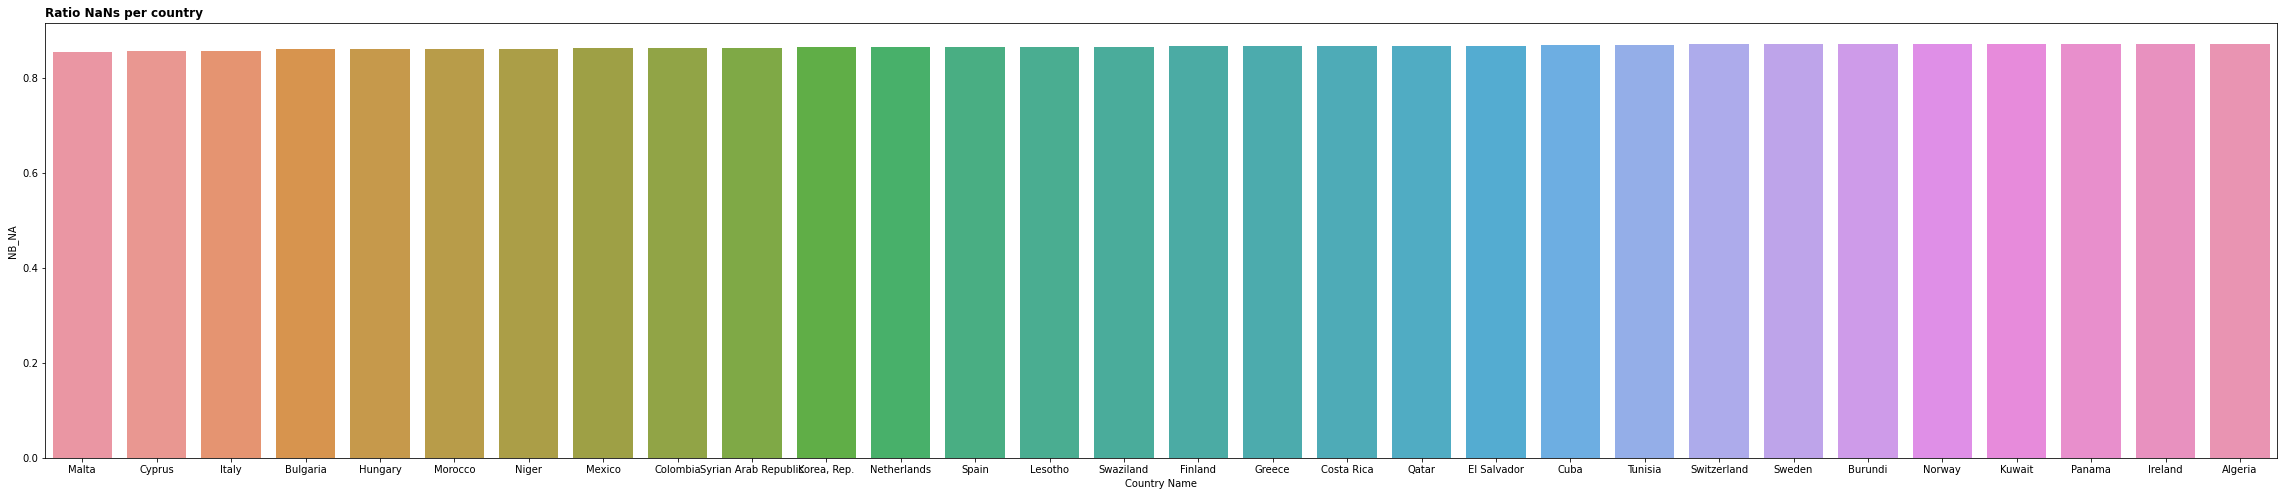

In [22]:
# File data - ratio of NaNs per country
data['NB_NA'] = data.isna().sum(axis=1)/data.iloc[:,4:].shape[1]
ratio_vm_pays = data.groupby('Country Name')['NB_NA'].mean().sort_values().iloc[:30]
plt.figure(figsize = (40,8))
sns.barplot(x=ratio_vm_pays.index, y = ratio_vm_pays)
plt.title('Ratio NaNs per country', fontweight = 'bold', loc = 'left')
plt.show()

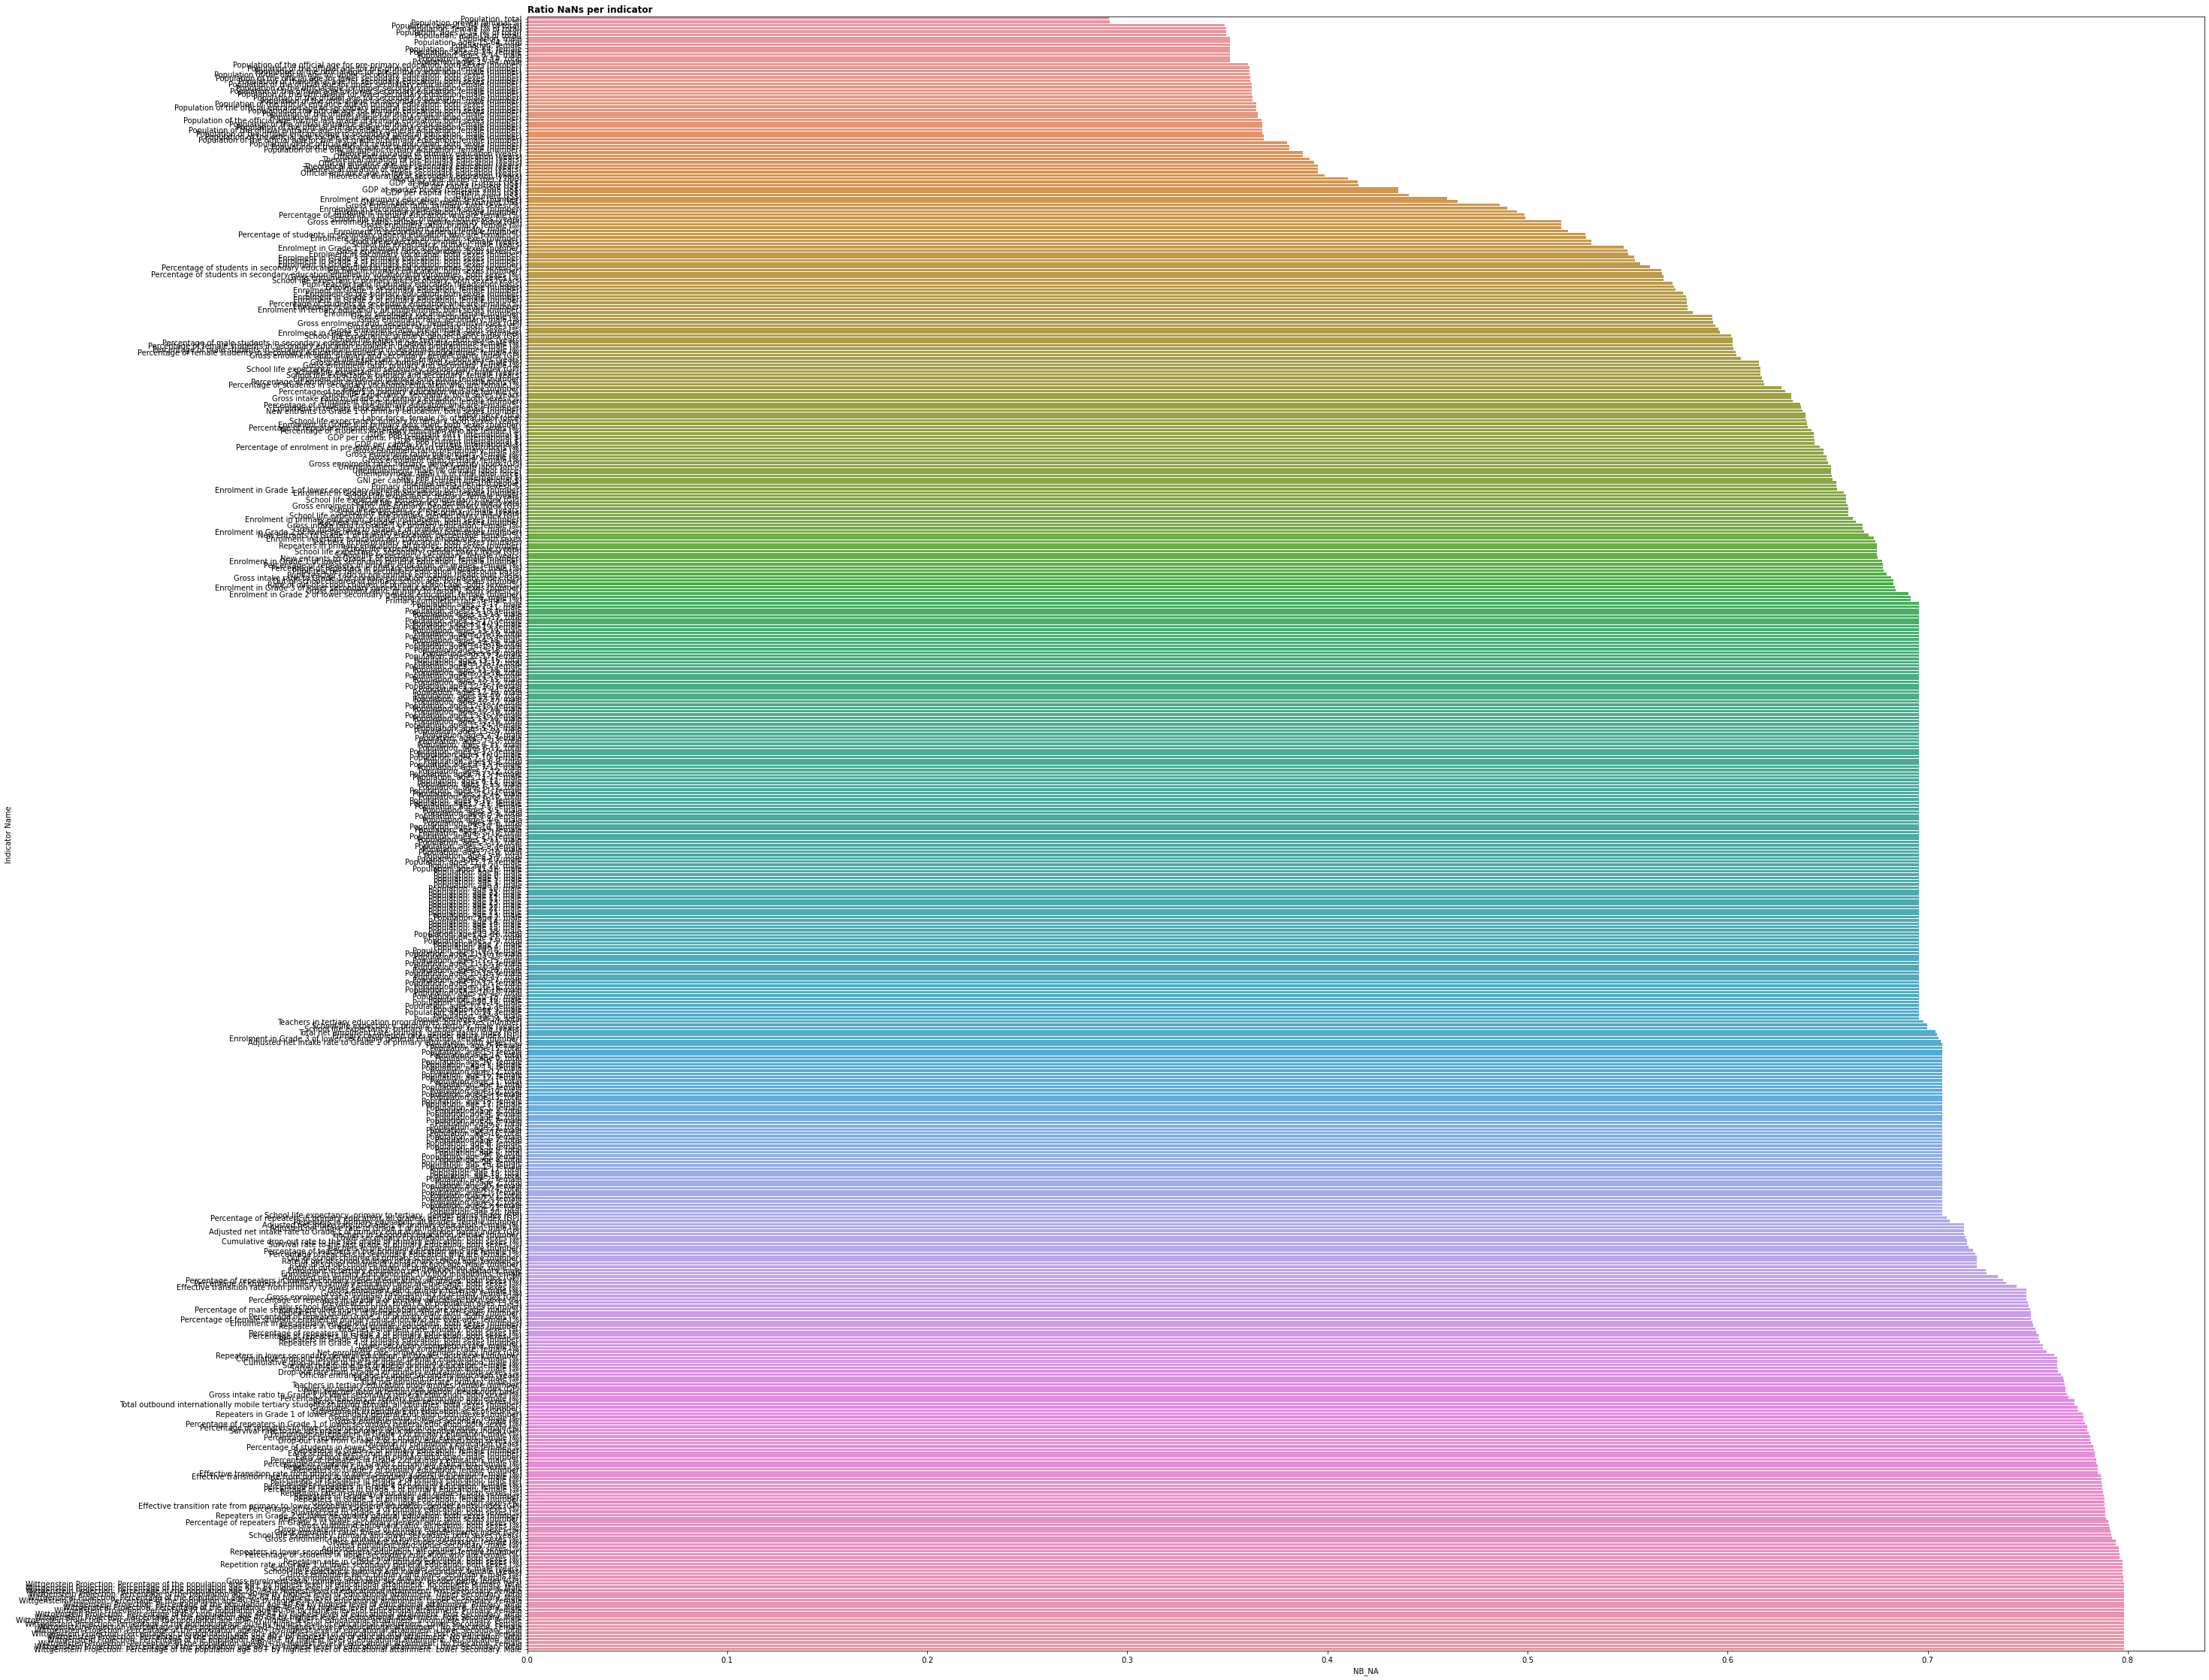

In [23]:
# File data - Ratio of NaNs per indicator
ratio_vm_indicateur = data.groupby('Indicator Name')['NB_NA'].mean().sort_values().iloc[:500]
plt.figure(figsize = (40,40))
sns.barplot(x=ratio_vm_indicateur, y = ratio_vm_indicateur.index)
plt.title('Ratio NaNs per indicator', fontweight = 'bold', loc = 'left')
plt.show()

In [24]:
# File data - Dispalying % of NaN 
data.isna().mean().mean()

0.8467128022665658

# <a name="C5">Files comparison</a>

In [25]:
# Comparing indicators across files Data and Series
series['Series Code'].nunique() 
data['Indicator Code'].nunique() 
data[~data['Indicator Code'].isin(series['Series Code'].unique())][['Indicator Code','NB_NA']].info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12826 entries, 16 to 886925
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Code  12826 non-null  object 
 1   NB_NA           12826 non-null  float64
dtypes: float64(1), object(1)
memory usage: 300.6+ KB


In [26]:
# Comparing countries between Data and Country
country['Short Name'].nunique()
data['Country Name'].nunique()
country[~country['Short Name'].isin(data['Country Name'].unique())][['Short Name']]
data[~data['Country Code'].isin(country['Country Code'].unique())][['Country Name','NB_NA']].info()
country.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102620 entries, 0 to 597394
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Country Name  102620 non-null  object 
 1   NB_NA         102620 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.3+ MB


(214, 31)

# Part 2 : Data Pre-exploratory

# <a name="C6">Step 1 - Indicators selection (missing values)</a> 

In [27]:
# Adding column Topic to file Data
series.rename(columns = {'Series Code':'Indicator Code'}, inplace = True)
data = data.merge(series[['Indicator Code', 'Topic']],how='left',on='Indicator Code')
data.head(1)

Country Name Country Code  \
0   Arab World          ARB   

                                                 Indicator Name  \
0  Adjusted net enrolment rate, lower secondary, both sexes (%)   

  Indicator Code  1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  \
0     UIS.NERA.2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2016  2017  2020  2025  2030  2035  2040  2045  2050  2055  2060  2065  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2070  2075  2080  2085  2090  2095  2100  NB_NA      Topic  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN    1.0  Secondary

In [28]:
# Adding columns Income Group and Region to file Data 
data = data.merge(country[['Country Code', 'Region','Income Group']],how='inner',on='Country Code')
data.head(1)

Country Name Country Code  \
0  Afghanistan          AFG   

                                                 Indicator Name  \
0  Adjusted net enrolment rate, lower secondary, both sexes (%)   

  Indicator Code  1970  1971  1972  1973     1974  1975  1976  1977  1978  \
0     UIS.NERA.2   NaN   NaN   NaN   NaN  7.05911   NaN   NaN   NaN   NaN   

   1979  1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1991  1992       1993  1994  1995  1996  1997  1998  1999  2000  2001  \
0   NaN   NaN  17.260189   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2002  2003  2004  2005  2006      2007  2008  2009  2010  2011  2012  \
0   NaN   NaN   NaN   NaN   NaN  28.05987   NaN   NaN   NaN   NaN   NaN   

       2013       2014  2015  2016  2017  2020  2025  2030  2035  2040  2045  \
0  47.43679  50.627232   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2050  2055  2060  2065  2070  2075  2080  2085  2090  2095  2100     NB_NA  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.923077   

       Topic      Region Income Group  
0  Secondary  South Asia   Low income

[]

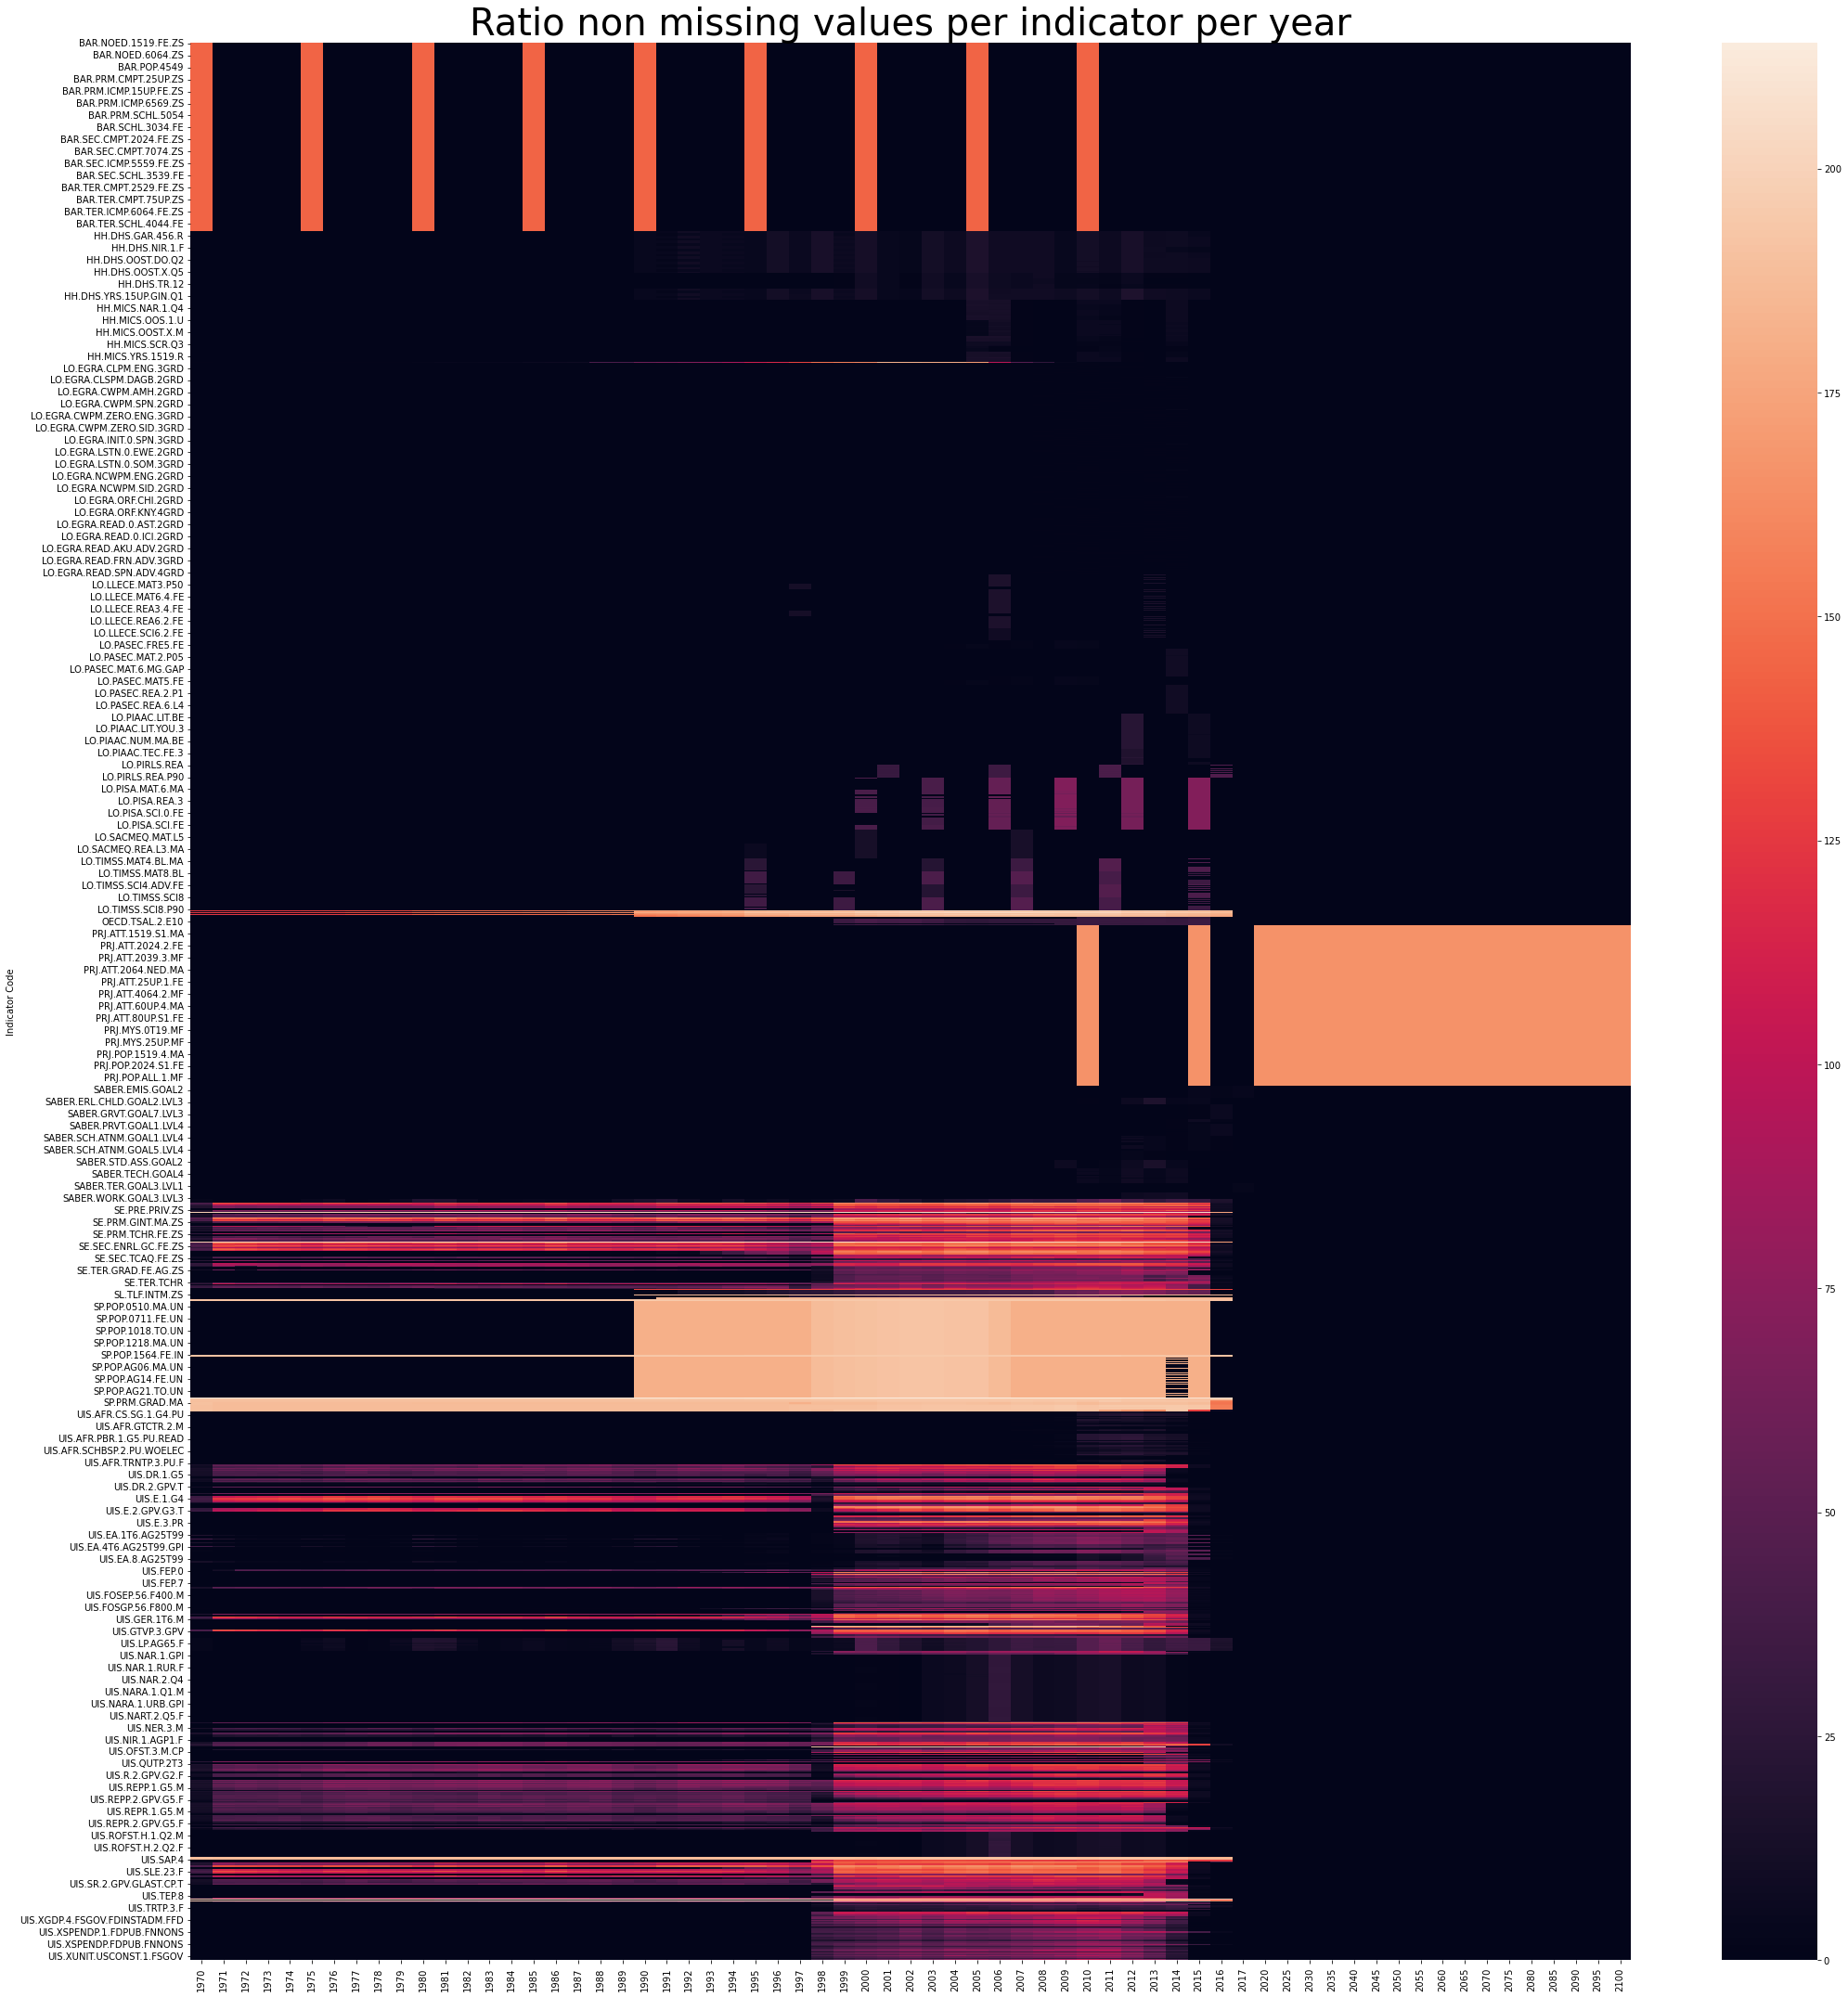

In [29]:
# Checking the ratio of missing values per indicator and year
annee = data.columns[4:69]
data_heat_indann = data.groupby(['Indicator Code']).count()[annee]
plt.figure(figsize=(30,30))
plt.title('Ratio non missing values per indicator per year', fontsize=40)
ax = sns.heatmap(data = data_heat_indann)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.plot()

[]

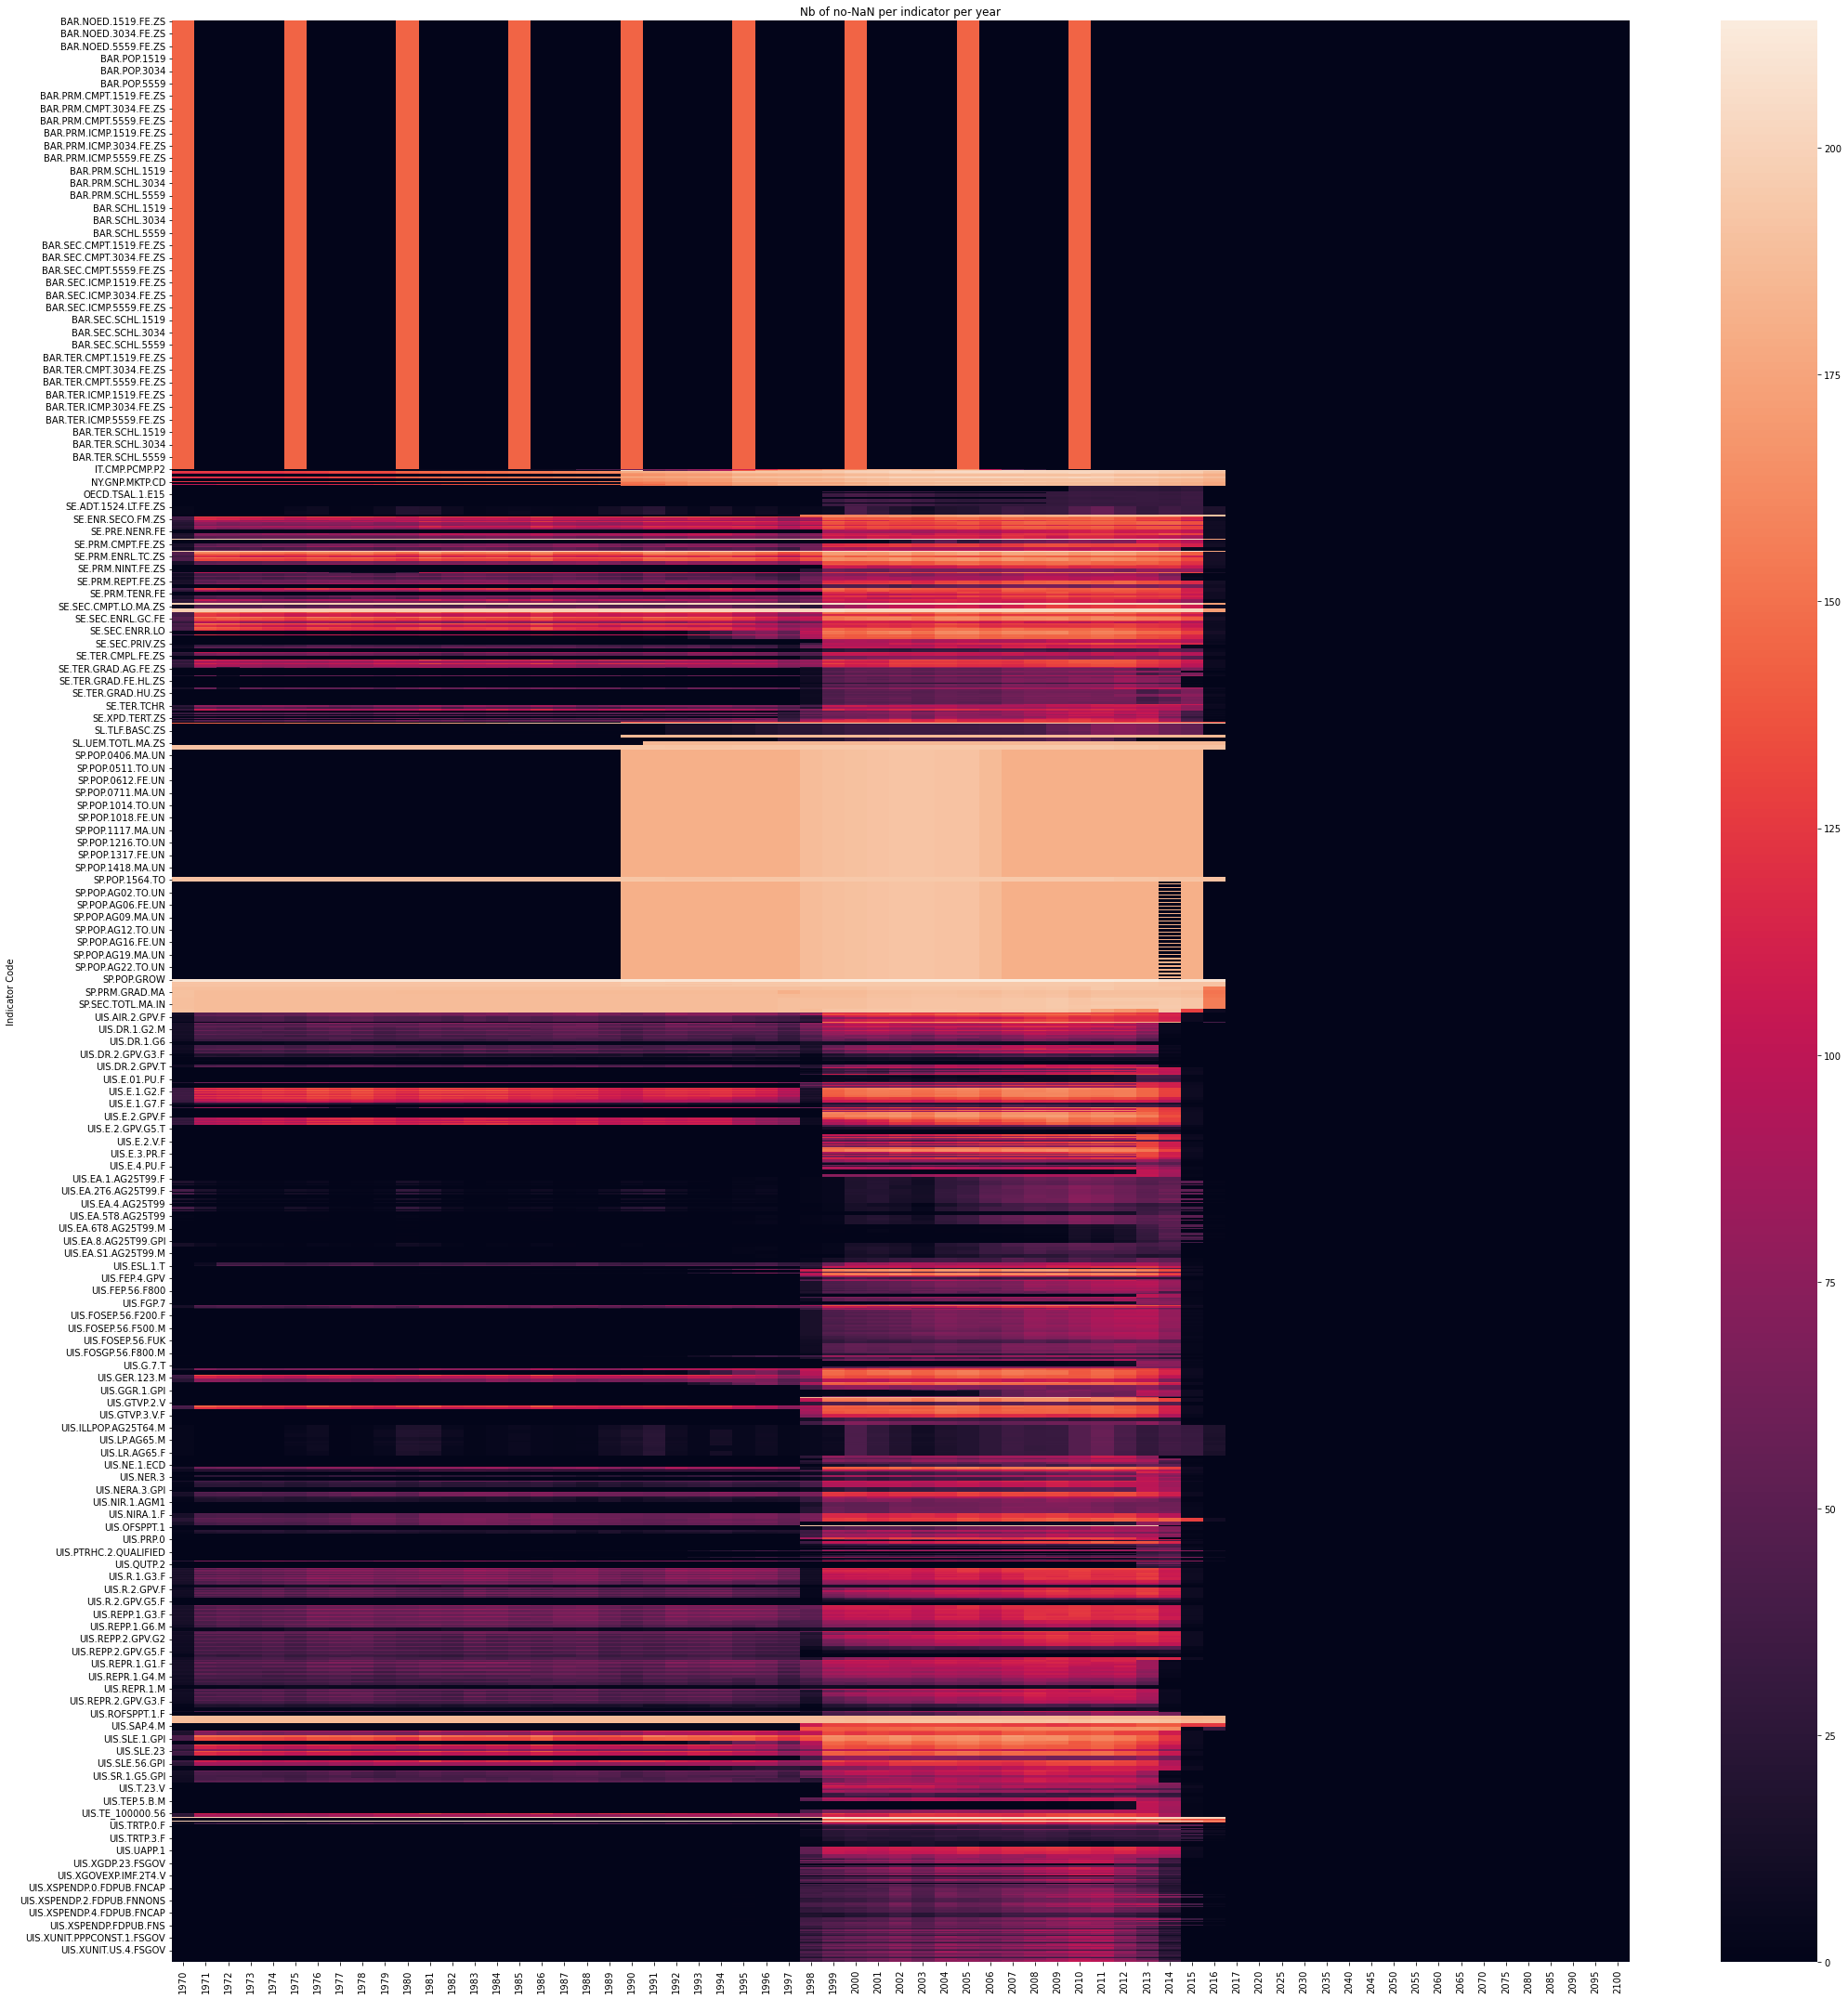

In [30]:
# Removing indicators with none or few data
INDIC_A_SUPP = [i for i in data['Indicator Code'] if i.startswith('UIS.AFR')|i.startswith('HH')|i.startswith('UIS.NAR')|i.startswith('LO')|i.startswith('UIS.ROFST')|i.startswith('SABER')|i.startswith('PRJ')]
data = data[-data['Indicator Code'].isin(INDIC_A_SUPP)]
annee = data.columns[4:69]
data_heat_indann = data.groupby(['Indicator Code']).count()[annee]
plt.figure(figsize=(30,30))
plt.title('Nb of no-NaN per indicator per year')
ax = sns.heatmap(data = data_heat_indann)
plt.tight_layout()
plt.plot()

In [31]:
# Removing years with none or few data or no relevant data
for column in data.iloc[:,4:69].columns:
    if int(column) > 2014 or int(column) < 2000:
        data.drop(columns = column, inplace = True)

In [32]:
# Displaying nb of unique indicators left
data['Indicator Code'].nunique()

1560

In [33]:
# Displaying nb of NaN of new data
data_taux = data.drop(['NB_NA','Topic','Region','Income Group'],axis=1)
data_taux.isna().mean().mean()

0.48710286680035825

# <a name="C7">Step 2 - Countries selection (relevance to mission)</a> 

In [34]:
# Before filtering countries by relevance to the problem, let's look if possible to filter by "group" of countries, given that the heatmap above showed no or very little information for some countries
data_heat = data[['Country Name', 'Country Code', 'Indicator Name', 
                   'Indicator Code', '2010', 'Region','Topic','Income Group']]
data_heat['NaN'] = data_heat[['Indicator Code', 'Country Name', '2010']]['2010'].isna().astype(int)

C:\Users\najwa\AppData\Local\Temp\ipykernel_24660\3258755637.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_heat['NaN'] = data_heat[['Indicator Code', 'Country Name', '2010']]['2010'].isna().astype(int)


[]

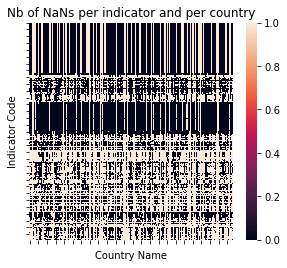

In [35]:
# Observing NaNs per indicator and country
data_heat_inc = data_heat.pivot_table('NaN', index = 'Indicator Code', columns='Country Name', aggfunc="mean")
plt.figure(figsize=(6,6))
plt.title('Nb of NaNs per indicator and per country')
ax = sns.heatmap(data_heat_inc)
plt.tight_layout()
ax.set(xticklabels=[]) 
ax.set(yticklabels=[]) 
plt.plot()

[]

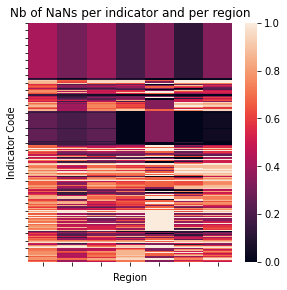

In [36]:
# Observing NaNs per indicator and region
data_heat_inr = data_heat.pivot_table('NaN', index = 'Indicator Code', columns='Region', aggfunc="mean")
plt.figure(figsize=(6,6))
plt.title('Nb of NaNs per indicator and per region')
ax = sns.heatmap(data_heat_inr)
plt.tight_layout()
ax.set(xticklabels=[]) 
ax.set(yticklabels=[]) 
plt.plot()

[]

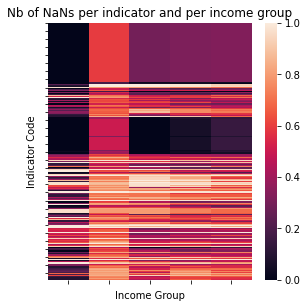

In [37]:
# Observing NaNs per indicator and income group
data_heat_inig = data_heat.pivot_table('NaN', index = 'Indicator Code', columns='Income Group', aggfunc="mean")
plt.figure(figsize=(6,6))
plt.title('Nb of NaNs per indicator and per income group')
ax = sns.heatmap(data_heat_inig)
plt.tight_layout()
ax.set(xticklabels=[]) 
ax.set(yticklabels=[]) 
plt.plot()

In [38]:
# The heatmaps above did not find a correlation between the missing values and the grouping of countries.
# Analysing the countries to determine the most relevant to our problem - rich countries by considering the indicators relating to GDP per capita and the total population
INDIC_SEL = ["NY.GDP.PCAP.KD","SP.POP.TOTL"]

In [39]:
# Observing the Data file limited to these two indicators
data_ind = data[data['Indicator Code'].isin(INDIC_SEL)]

In [40]:
# Visualising this new file in pivot format and for the year 2014 - the most "recent".
data_ind = data_ind.pivot_table('2014', index=['Country Name'], columns='Indicator Code')

In [41]:
# Displaying countries without these two indicators provided for GDP
country_nagdp = data_ind.loc[data_ind['NY.GDP.PCAP.KD'].isna(),:]
country_nagdp

Indicator Code             NY.GDP.PCAP.KD  SP.POP.TOTL
Country Name                                          
Aruba                                 NaN     103795.0
Bermuda                               NaN      65139.0
Cayman Islands                        NaN      59172.0
Channel Islands                       NaN     162969.0
Faroe Islands                         NaN      48842.0
French Polynesia                      NaN     275484.0
Korea, Dem. People’s Rep.             NaN   25116363.0
Libya                                 NaN    6204108.0
Liechtenstein                         NaN      37127.0
Monaco                                NaN      38132.0
New Caledonia                         NaN     268000.0
Puerto Rico                           NaN    3534874.0
Somalia                               NaN   13513125.0
Syrian Arab Republic                  NaN   19203090.0
Turks and Caicos Islands              NaN      33739.0

In [42]:
# Countries with no information on their GDP in 2014 are countries with a population below 20M except for Korea. Excluding a possible country is allowed.
# Overview of countries that do not have these two indicators provided information for the total population
country_napop = data_ind.loc[data_ind['SP.POP.TOTL'].isna(),:]
country_napop

Empty DataFrame
Columns: [NY.GDP.PCAP.KD, SP.POP.TOTL]
Index: []

In [43]:
# Checking the stats of these two indicators
data_ind.describe()

Indicator Code  NY.GDP.PCAP.KD   SP.POP.TOTL
count               194.000000  2.090000e+02
mean              14169.957862  3.458860e+07
std               19338.148964  1.345559e+08
min                 243.101912  1.090800e+04
25%                1680.954919  1.129424e+06
50%                5862.603614  6.552584e+06
75%               16653.974935  2.346069e+07
max              107152.908942  1.364270e+09

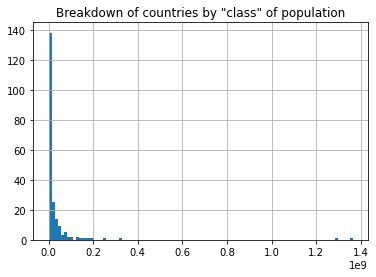

In [44]:
# Observing the distribution of countries by population "class"
ax =data_ind["SP.POP.TOTL"].hist(bins=100)
plt.title('Breakdown of countries by "class" of population')
#plt.tight_layout()
plt.show()

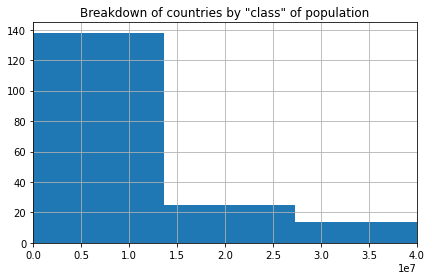

In [45]:
# Observing above zoomed on the less than 40M population
ax =data_ind["SP.POP.TOTL"].hist(bins=100)
plt.title('Breakdown of countries by "class" of population')
plt.tight_layout()
ax.set_xlim([0,40000000])
plt.show()

In [46]:
# Displaying the 50 most populous countries
data_ind["SP.POP.TOTL"].sort_values(ascending=False)[:50]

Country Name
China                 1.364270e+09
India                 1.293859e+09
United States         3.185635e+08
Indonesia             2.551311e+08
Brazil                2.042131e+08
Pakistan              1.855463e+08
Nigeria               1.764605e+08
Bangladesh            1.594053e+08
Russian Federation    1.438197e+08
Japan                 1.272760e+08
Mexico                1.242216e+08
Philippines           1.001022e+08
Ethiopia              9.736677e+07
Egypt, Arab Rep.      9.181257e+07
Vietnam               9.072890e+07
Germany               8.098250e+07
Iran, Islamic Rep.    7.841109e+07
Turkey                7.703063e+07
Congo, Dem. Rep.      7.372286e+07
Thailand              6.841677e+07
France                6.633196e+07
United Kingdom        6.461316e+07
Italy                 6.078914e+07
South Africa          5.414673e+07
Tanzania              5.223487e+07
Myanmar               5.192418e+07
Korea, Rep.           5.074666e+07
Colombia              4.779191e+07
Spain  

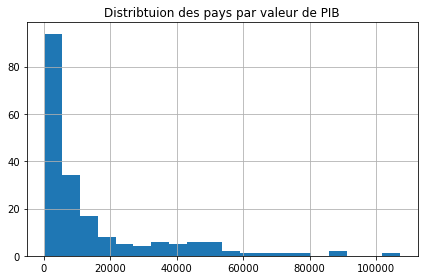

In [47]:
# Visualising the distribution of countries by value of GDP per capita
data_ind["NY.GDP.PCAP.KD"].hist(bins=20)
plt.title('Distribtuion des pays par valeur de PIB')
plt.tight_layout()
plt.show()

In [48]:
# Displaying the 50 most "rich" countries
data_ind["NY.GDP.PCAP.KD"].sort_values(ascending=False)[:50]

Country Name
Luxembourg               107152.908942
Norway                    89274.956140
Isle of Man               87612.121165
Switzerland               76410.856659
Macao SAR, China          69749.131050
Qatar                     67901.218813
Denmark                   59437.933897
Ireland                   54527.290721
Australia                 54394.334266
Sweden                    53561.892121
San Marino                52708.000800
Singapore                 51865.717987
United States             50782.520695
Netherlands               50497.236799
Canada                    50067.042792
Austria                   47886.559274
Japan                     46466.122973
Finland                   45239.368803
Germany                   45022.565349
Belgium                   44702.316895
Iceland                   44477.935806
France                    41431.039605
United Kingdom            40908.745855
Andorra                   40785.049228
Greenland                 40629.962518
United Arab 

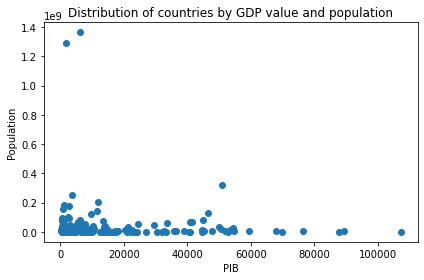

In [49]:
# Making a bi-varied analysis of these two indicators to be able to determine thresholds to select relevant countries
plt.plot(data_ind["NY.GDP.PCAP.KD"],data_ind["SP.POP.TOTL"],'o')
plt.xlabel("PIB")
plt.ylabel("Population")
plt.title('Distribution of countries by GDP value and population')
plt.tight_layout()
plt.show()

In [50]:
# Selecting countries according to defined criteria - either GDP sup. 10000 and population sup. 10M or GDP sup. 1000 and population sup. 100M
PAYS_SEL = data_ind[((data_ind['NY.GDP.PCAP.KD'] > 10000) & (data_ind['SP.POP.TOTL'] > 10000000))  |  ((data_ind['NY.GDP.PCAP.KD'] > 1000) & (data_ind['SP.POP.TOTL'] > 100000000))].index
PAYS_SEL

Index(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'China', 'Czech Republic', 'France', 'Germany', 'Greece', 'India',
       'Indonesia', 'Italy', 'Japan', 'Kazakhstan', 'Korea, Rep.', 'Malaysia',
       'Mexico', 'Netherlands', 'Nigeria', 'Pakistan', 'Philippines', 'Poland',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Spain', 'Turkey',
       'United Kingdom', 'United States', 'Venezuela, RB'],
      dtype='object', name='Country Name')

In [51]:
# Filtring Data to these countries
data = data[data['Country Name'].isin(PAYS_SEL)]
data.shape

(49920, 23)

In [52]:
# Displaying nb of countries left
data['Country Code'].nunique()

32

In [53]:
# Checking nb of NaNs in new dataset
data_taux = data.drop(['NB_NA','Topic','Region','Income Group'],axis=1)
data_taux.isna().mean().mean()

0.4144968792172739

# <a name="C8">Step 3 - Filter of indicators (relevance to business problem)</a> 

In [54]:
# Displaying the themes and the number of indicators per theme
data.groupby('Topic')['Indicator Code'].nunique()

Topic
Attainment                                                                                      425
Background                                                                                        1
Early Childhood Education                                                                        23
Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita                             1
Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators      2
Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators            3
Economic Policy & Debt: Purchasing power parity                                                   6
Expenditures                                                                                     86
Health: Mortality                                                                                 1
Health: Population: Dynamics                                                                  

C:\Users\najwa\AppData\Local\Temp\ipykernel_24660\861370913.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_heat['NaN'] = data_heat[['Indicator Code', 'Country Name', '2010']]['2010'].isna().astype(int)


[]

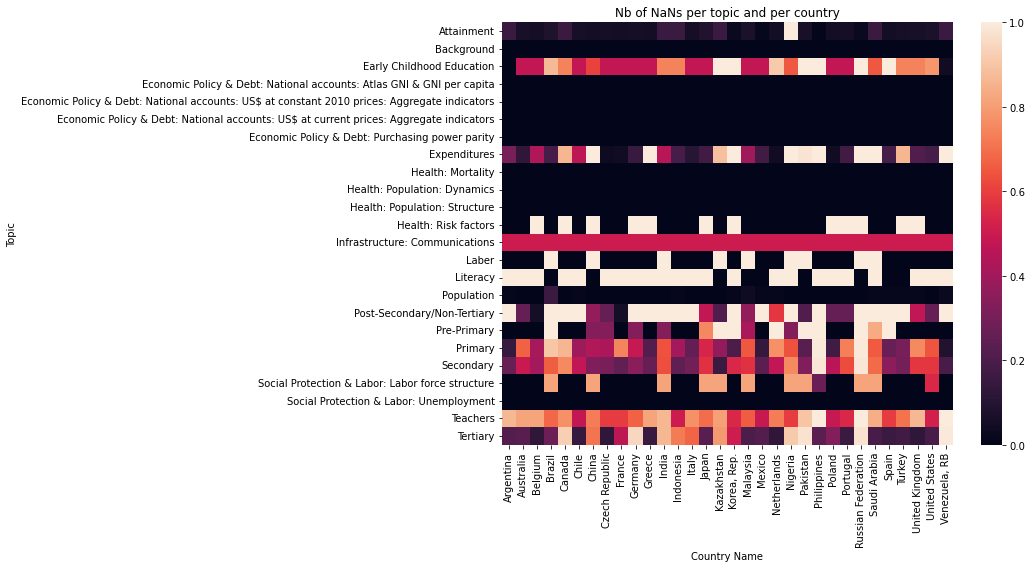

In [55]:
# Analysing the distribution of NaN by country and topic, now that only 32 countries are selected.
# This analysis will also make it possible to confirm or not the selection of a topic according to its filling
data_heat = data[['Country Name', 'Country Code', 'Indicator Name', 
                   'Indicator Code', '2010', 'Region','Topic','Income Group']]
data_heat['NaN'] = data_heat[['Indicator Code', 'Country Name', '2010']]['2010'].isna().astype(int)
data_heat_coto = data_heat.pivot_table('NaN', index = 'Topic', columns='Country Name', aggfunc="mean")
plt.figure(figsize=(15,8))
plt.title('Nb of NaNs per topic and per country')
ax = sns.heatmap(data = data_heat_coto)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.plot()

In [56]:
# Identifying themes relevant to the business problem
# This identification was made from the quick reading of the indicators in the Series file which summarizes the indicators and their theme.
TOPIC_DEMOGRAPHIE = ['Population','Secondary','Tertiary']
TOPIC_BUDGET = ['Expenditures','Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita','Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators','Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators','Economic Policy & Debt: Purchasing power parity']
TOPIC_OFFRE = ['Teachers']
TOPIC_INFRASTRUCTURE = ['Infrastructure: Communications']

In [57]:
# Listing indicators related to the Demography theme
series_demographie = series[series['Topic'].isin(TOPIC_DEMOGRAPHIE)]
series_demographie['Indicator Name'].tolist()

['Gross enrolment ratio, primary and secondary, gender parity index (GPI)',
 'Gross enrolment ratio, secondary, gender parity index (GPI)',
 'Gross enrolment ratio, tertiary, gender parity index (GPI)',
 'School life expectancy, primary to tertiary, both sexes (years)',
 'School life expectancy, primary to tertiary, female (years)',
 'School life expectancy, primary to tertiary, male (years)',
 'Official entrance age to lower secondary education (years)',
 'Lower secondary completion rate, female (%)',
 'Lower secondary completion rate, male (%)',
 'Lower secondary completion rate, both sexes (%)',
 'Theoretical duration of secondary education (years)',
 'Theoretical duration of lower secondary education (years)',
 'Theoretical duration of upper secondary education (years)',
 'Enrolment in secondary education, both sexes (number)',
 'Enrolment in secondary education, female (number)',
 'Percentage of female students in secondary education enrolled in vocational programmes, female (%)',

In [58]:
# Selecting relevant demography-related indicators, after rapid analysis of the structure of the indicators
series_demographie = series[series['Topic'].isin(TOPIC_DEMOGRAPHIE)]
series_demographie = series_demographie[series_demographie['Indicator Name'].str.contains('upper secondary|tertiary')]
series_demographie = series_demographie[series_demographie['Indicator Name'].str.contains('male')==False]
series_demographie = series_demographie[series_demographie['Indicator Name'].str.contains('female')==False]
series_demographie = series_demographie[series_demographie['Indicator Name'].str.contains('gender parity')==False]
series_demographie.shape

(62, 15)

In [59]:
# Selecting relevant expenditure indicators
series_budget = series[series['Topic'].isin(TOPIC_BUDGET)]
series_budget.shape

(105, 15)

In [60]:
# Listing indicators related to the Offer theme
series_offre = series[series['Topic'].isin(TOPIC_OFFRE)]
series_offre['Indicator Name'].tolist()

['Annual statutory teacher salaries in public institutions in USD. Pre-Primary. Starting salary',
 'Annual statutory teacher salaries in public institutions in USD. Pre-Primary. 10 years of experience',
 'Annual statutory teacher salaries in public institutions in USD. Pre-Primary. 15 years of experience',
 'Annual statutory teacher salaries in public institutions in USD. Pre-Primary. Top of scale',
 'Annual statutory teacher salaries in public institutions in USD. Primary. Starting salary',
 'Annual statutory teacher salaries in public institutions in USD. Primary. 10 years of experience',
 'Annual statutory teacher salaries in public institutions in USD. Primary. 15 years of experience',
 'Annual statutory teacher salaries in public institutions in USD. Primary. Top of scale',
 'Annual statutory teacher salaries in public institutions in USD. Lower Secondary. Starting salary',
 'Annual statutory teacher salaries in public institutions in USD. Lower Secondary. 10 years of experience',

In [61]:
# Selecting relevant teacher-related indicators, after a quick analysis of the structure of the indicators
series_offre = series[series['Topic'].isin(TOPIC_OFFRE)]
series_offre = series_offre[series_offre['Indicator Name'].str.contains('upper secondary|tertiary')]
series_offre = series_offre[series_offre['Indicator Name'].str.contains('male')==False]
series_offre = series_offre[series_offre['Indicator Name'].str.contains('female')==False]
series_offre.shape

(18, 15)

In [62]:
# Selecting relevant indicators related to the necessary infrastructure
series_infra = series[series['Topic'].isin(TOPIC_INFRASTRUCTURE)]
series_infra.shape

(2, 15)

In [63]:
# First selection of relevant indicators, following a filter of themes and indicators
series_mission = pd.concat([series_demographie,series_budget,series_offre,series_infra])
series_mission.shape

(187, 15)

In [64]:
# Displaying nb of indicators left
data = data[data['Indicator Code'].isin(series_mission['Indicator Code'])]
data['Indicator Code'].nunique()

169

In [65]:
# Dispalying NaNs of new dataset
data_taux = data.drop(['NB_NA','Topic','Region','Income Group'],axis=1)
data_taux.isna().mean().mean()

0.3618810339458113

# <a name="C9">Step 4 - Selection of 3-4 most relevant indicators</a> 

In [66]:
# Displaying indicators in order of fill rate
data.sort_values('NB_NA')[['Topic', 'Indicator Name', 'Indicator Code','NB_NA']].drop_duplicates('Indicator Code')[:50]

Topic  \
358492                                                                                     Secondary   
316435        Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators   
316434  Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators   
316433        Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators   
316432  Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators   
269877                                                                                    Population   
268796                         Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita   
268795        Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators   
357831                                                                                    Population   
576744                                                                                      Tertiary   
320059                                                                                      Tertiary   
644302                                                                                      Tertiary   
371492                                                                                      Tertiary   
37851                                                                                       Tertiary   
39589                                                                                       Tertiary   
188220                                                                                      Tertiary   
373143                                                                                      Teachers   
372718                                                                                      Teachers   
243150                                                                                  Expenditures   
243128                                                                                  Expenditures   
243126                                                                                  Expenditures   
243122                                                                                  Expenditures   
741554                                                                                  Expenditures   
499692                                               Economic Policy & Debt: Purchasing power parity   
499689                                               Economic Policy & Debt: Purchasing power parity   
499688                                               Economic Policy & Debt: Purchasing power parity   
499687                                               Economic Policy & Debt: Purchasing power parity   
499686                                               Economic Policy & Debt: Purchasing power parity   
371540                                                                Infrastructure: Communications   
499693                                               Economic Policy & Debt: Purchasing power parity   
126694                                                                Infrastructure: Communications   
261558                                                                                     Secondary   
262769                                                                                      Teachers   
559394                                                                                    Population   
372022                                                                                      Tertiary   
595077                                                                                      Tertiary   
356725                                                                                     Secondary   
26941                                                                                   Expenditures   
188764                                 

In [67]:
# Selecting most relevant indicators - considering 1 to 3 indicators per theme (demo, infra, budget, supply)
SEL_IND = ["NY.GDP.PCAP.CD","SE.TER.ENRL","UIS.PTRHC.56","SE.XPD.TOTL.GD.ZS","SE.XPD.TERT.ZS","SE.XPD.SECO.ZS","IT.NET.USER.P2","UIS.PTRHC.3","UIS.E.3","SP.SEC.UTOT.IN","SP.TER.TOTL.IN"]

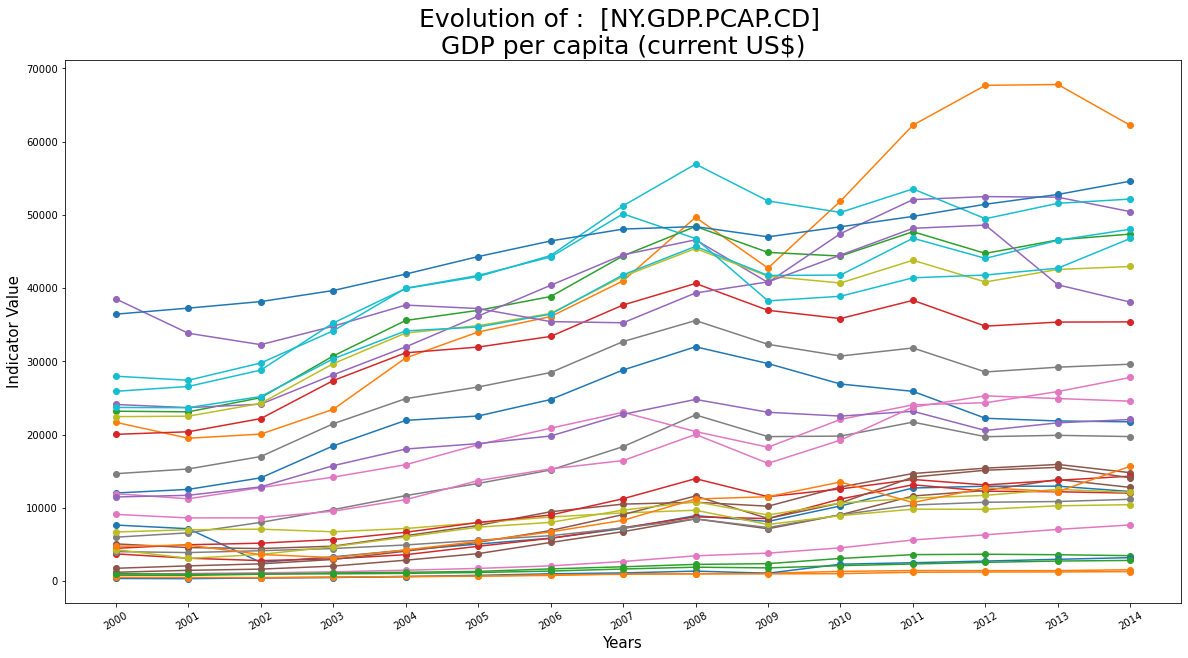

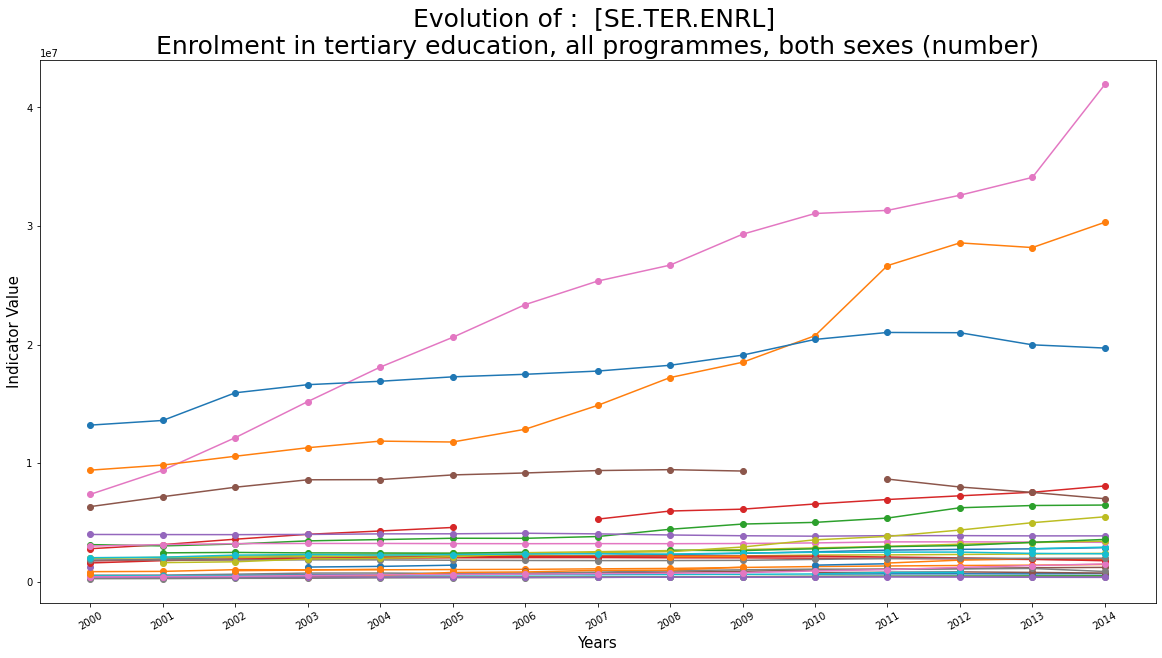

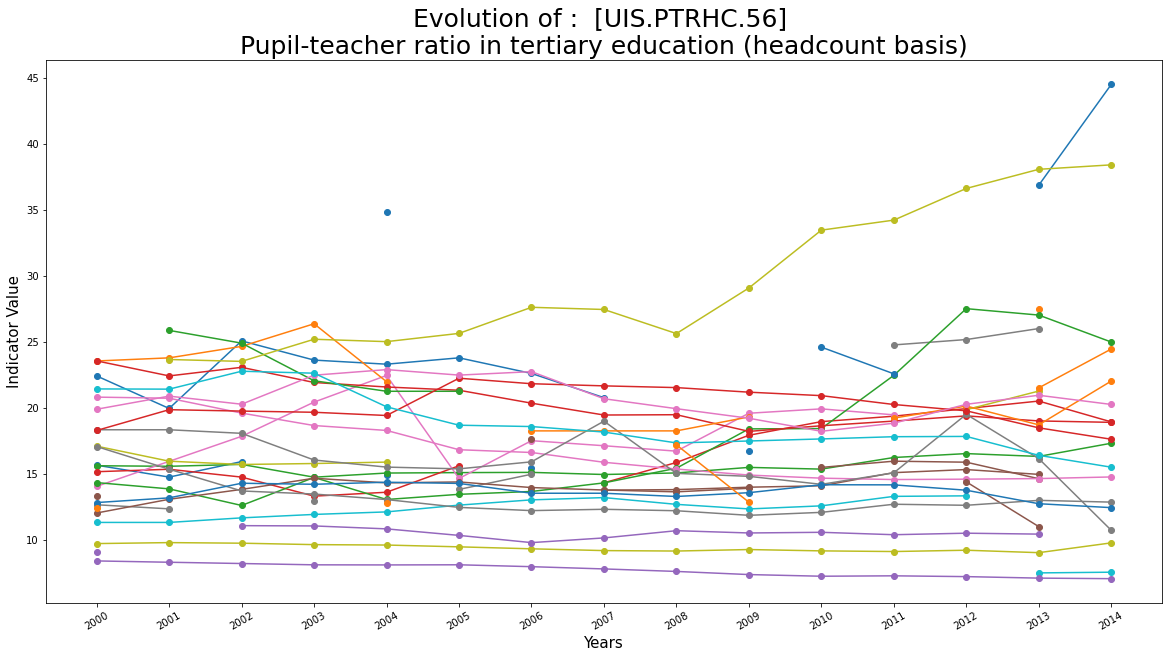

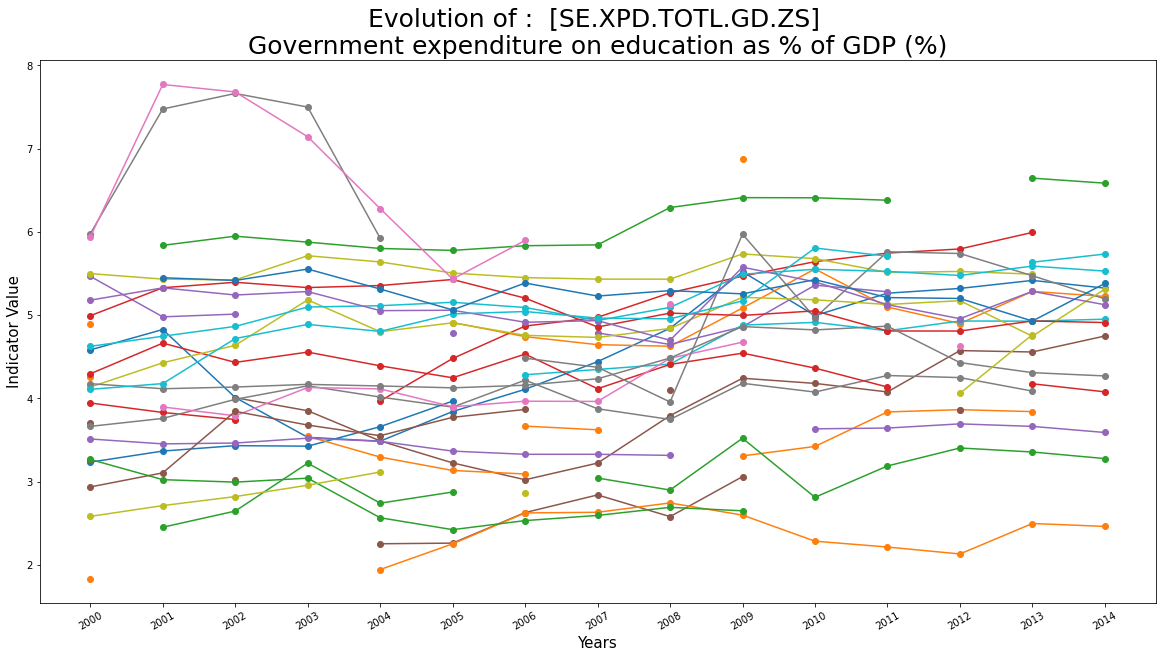

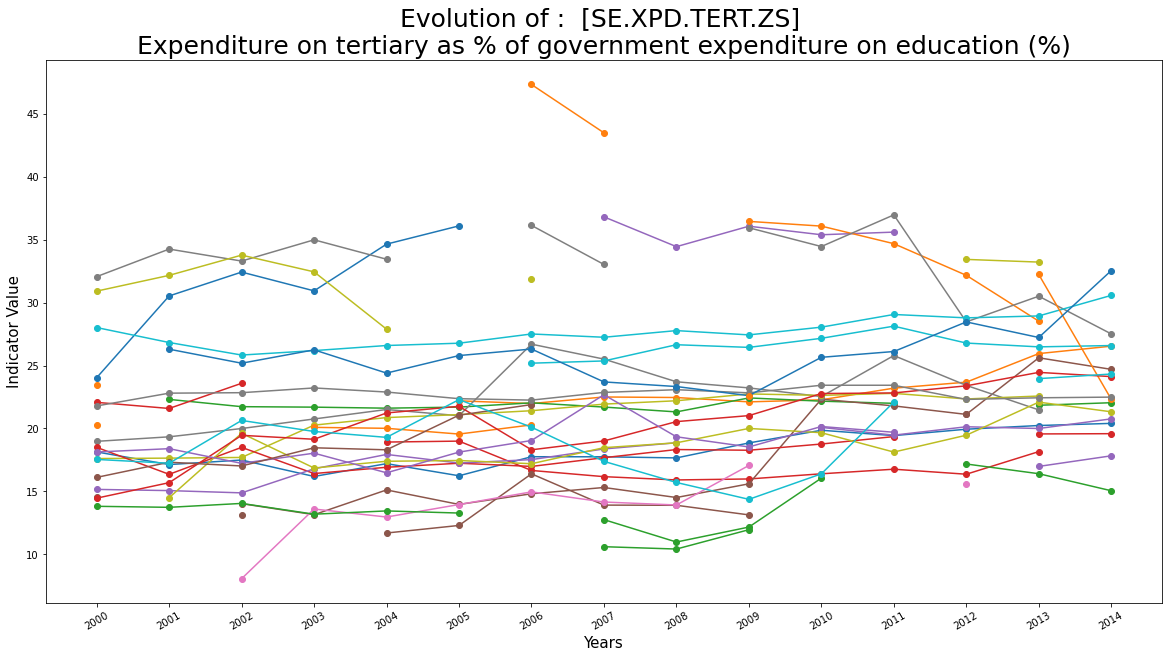

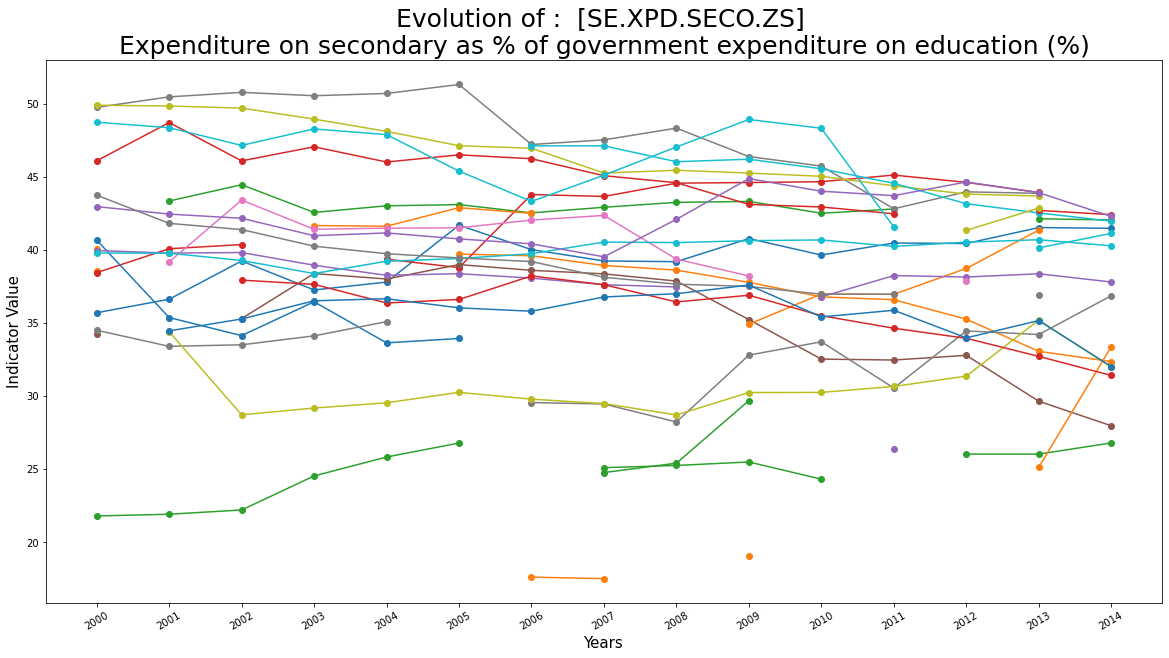

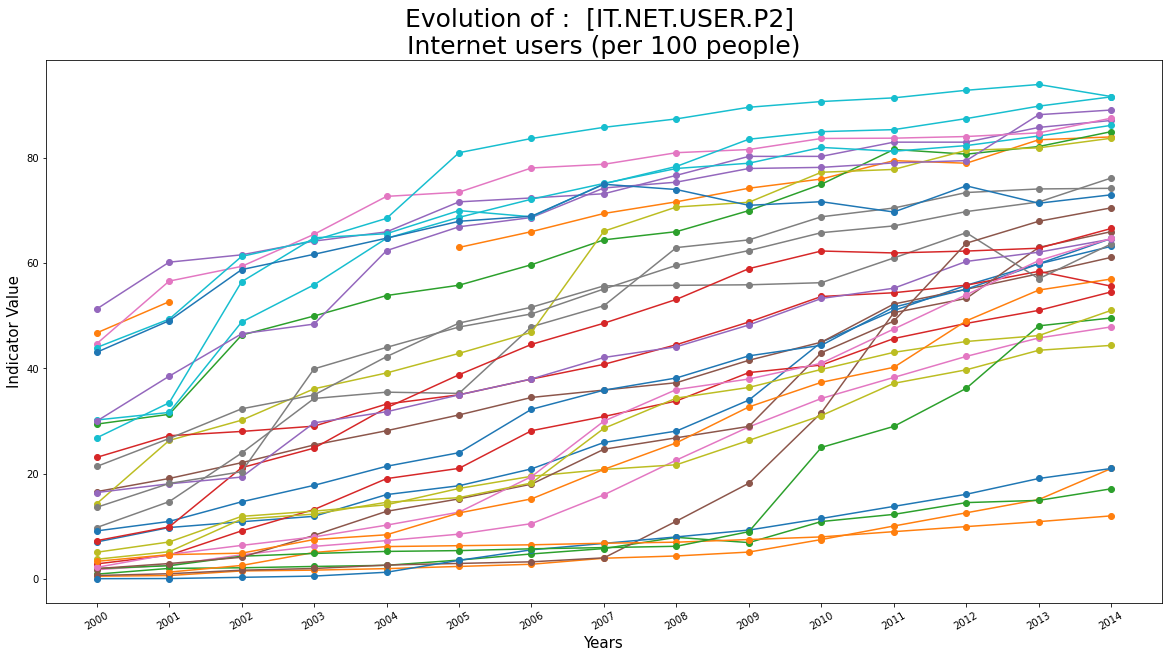

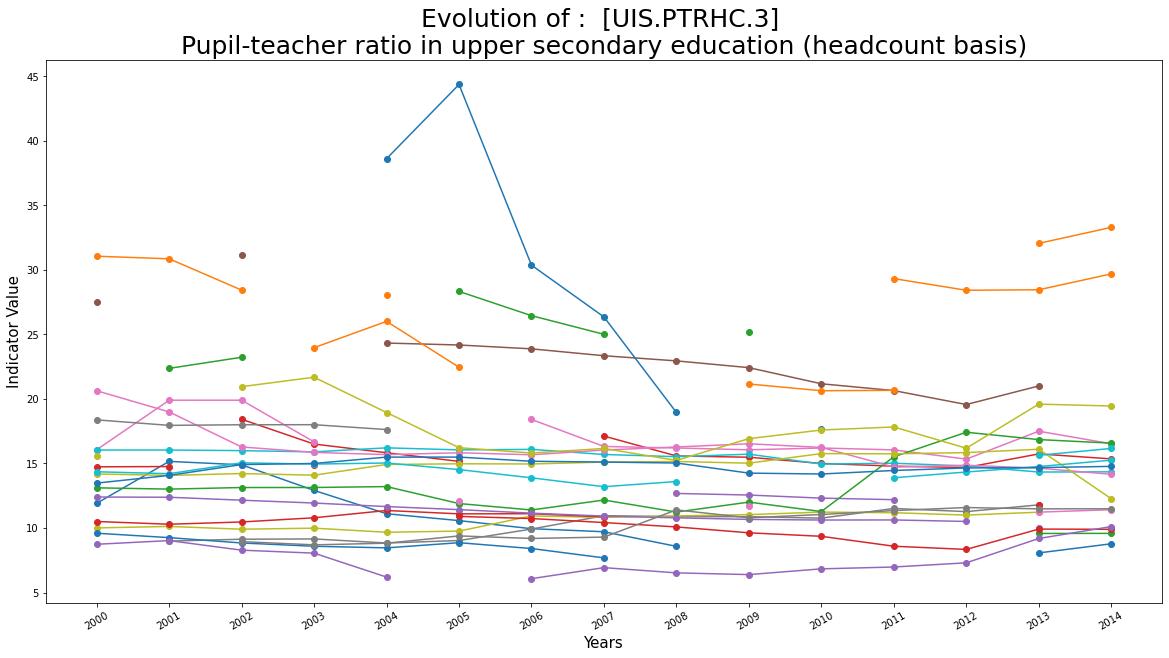

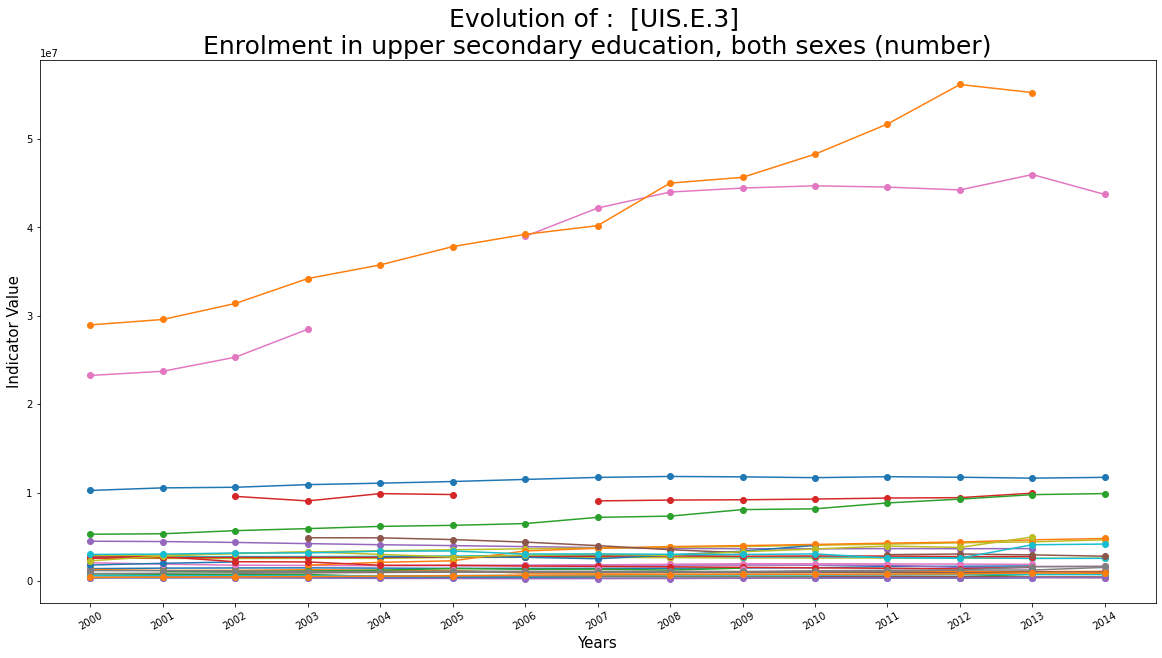

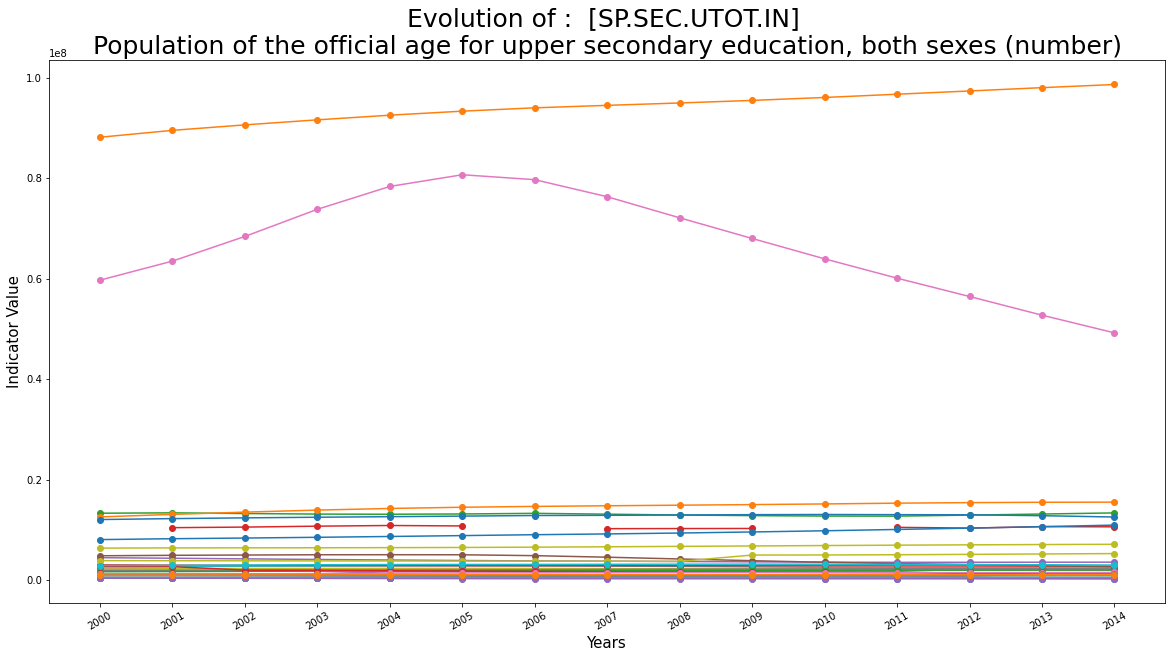

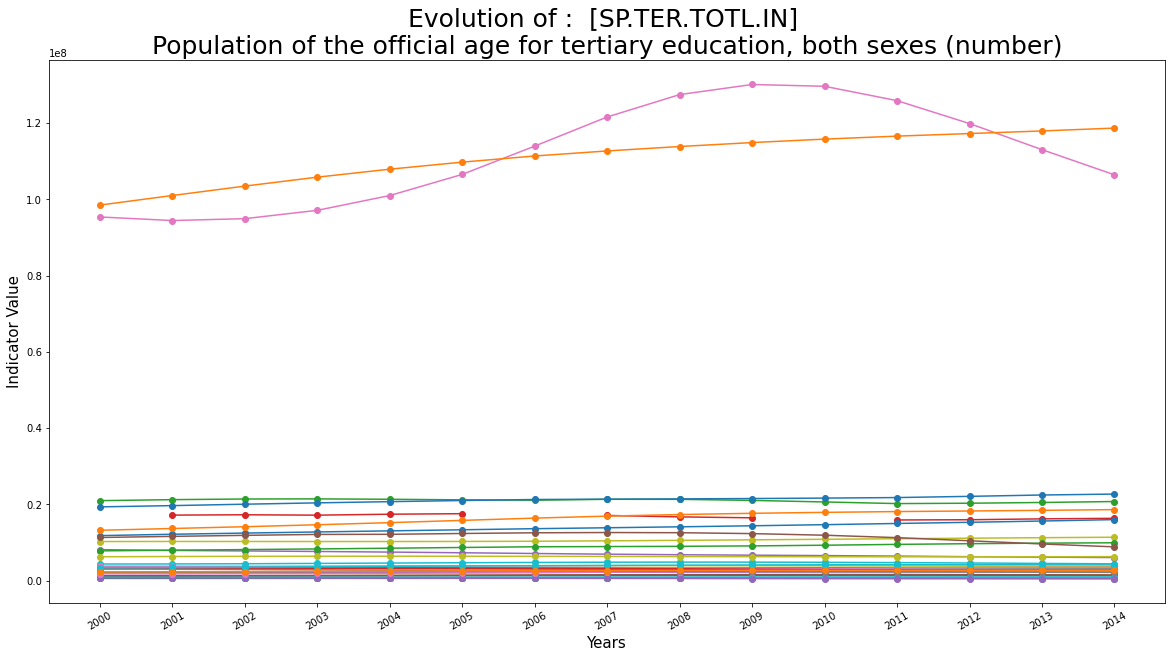

In [68]:
# Analysing evolution of each of these indicators
for indicateur in SEL_IND:
    graphe(indicateur)

In [69]:
# Adding a 2000-2014 column which is the average value of an indicator over the period 2000 to 2014. The decision to consider this average to answer the problem is motivated by the number of values for this period for the selected indicators and the form of the fairly constant and linear evolution.
data['2000-2014'] = data.mean(axis=1)

C:\Users\najwa\AppData\Local\Temp\ipykernel_24660\816050092.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['2000-2014'] = data.mean(axis=1)


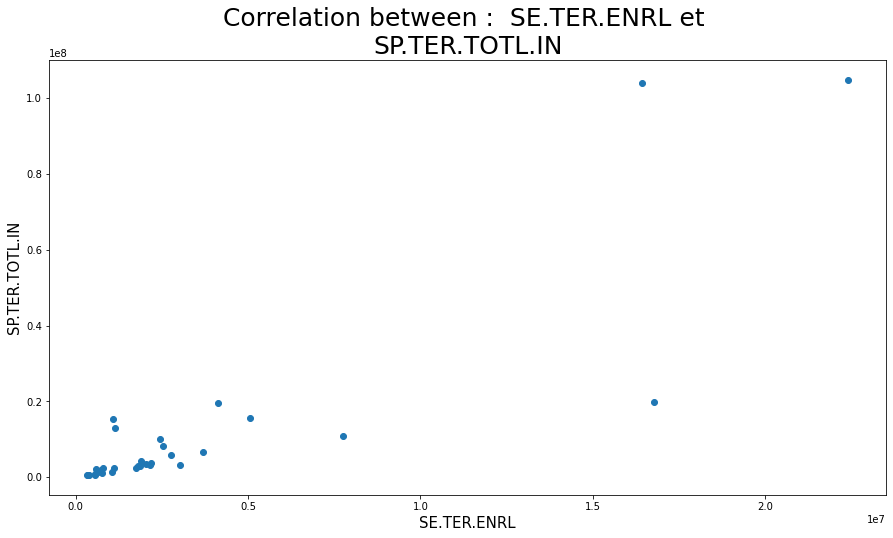

0.867892875241064
109799448959414.44


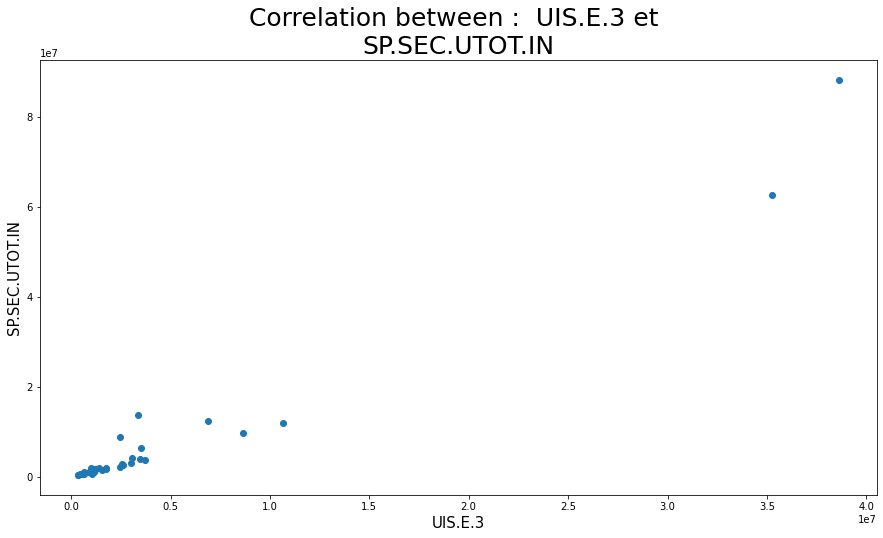

0.9801058502092264
153901622782328.62


In [70]:
# Analysing possible correlations between indicators of the same category
# Category demography
correlation_period("SE.TER.ENRL","SP.TER.TOTL.IN")
correlation_period("UIS.E.3","SP.SEC.UTOT.IN")

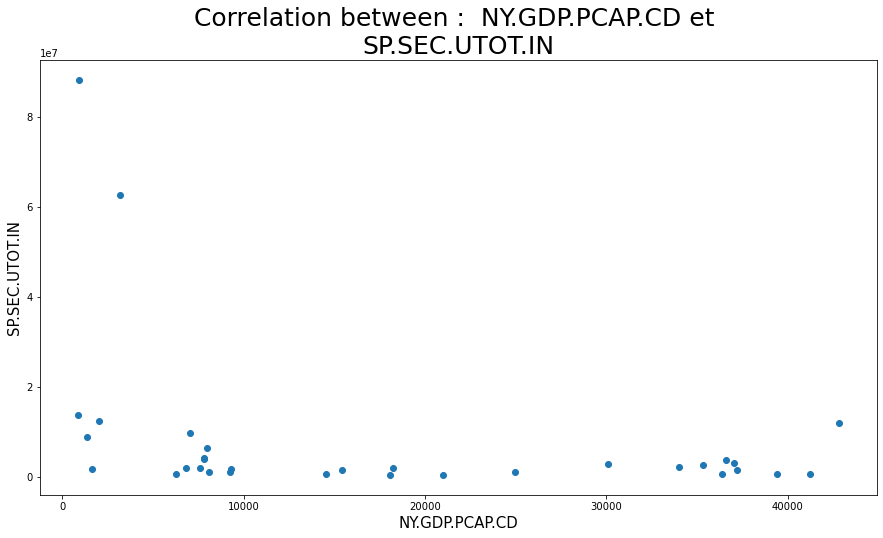

-0.3324187213267346
-85482217233.00943


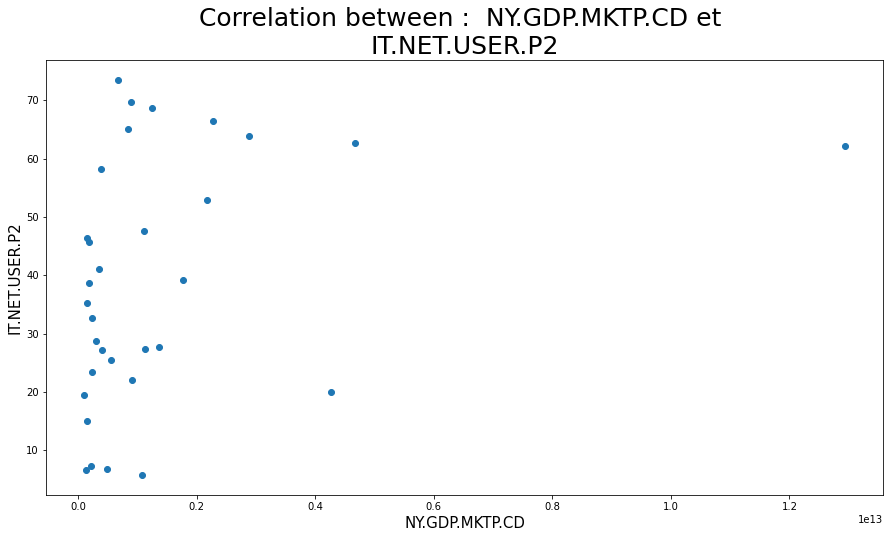

0.3281715490565873
16011763262690.89


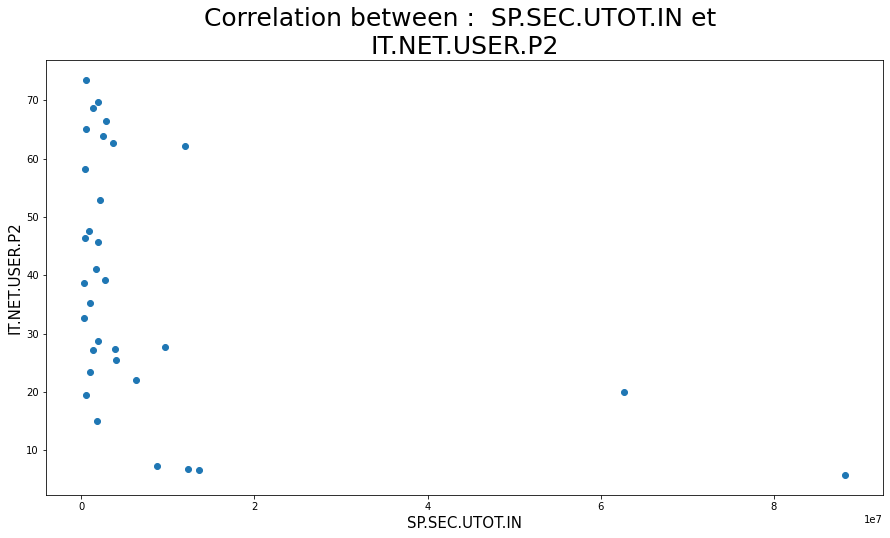

-0.4045289935788132
-151400775.90241295


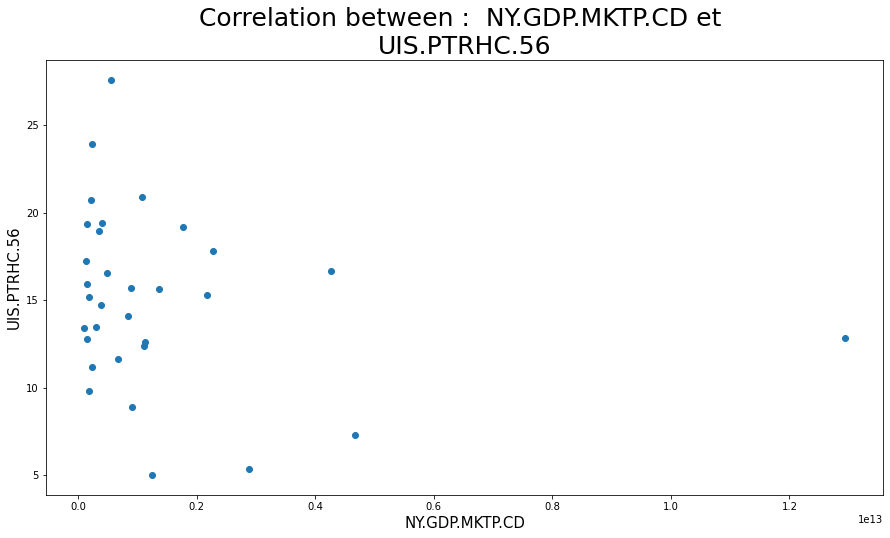

-0.21279818811057757
-2463828570633.607


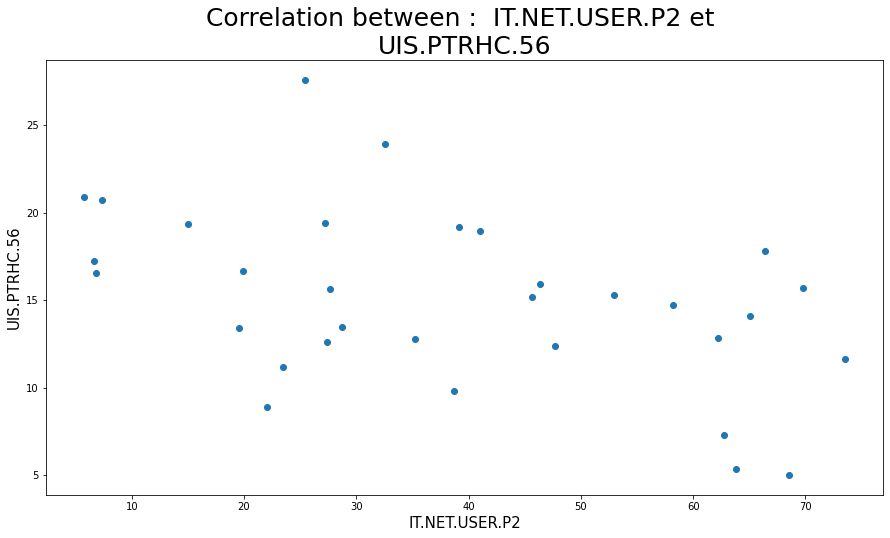

-0.46049327275020563
-46.73065892716001


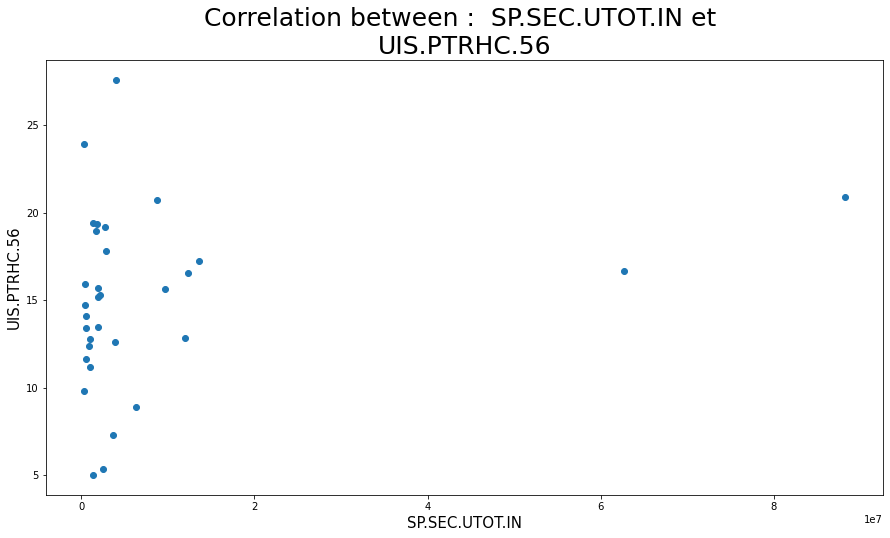

0.2317399925377122
20581819.41575758


In [71]:
# Analysing possible correlations between indicators of different categories
correlation_period("NY.GDP.PCAP.CD","SP.SEC.UTOT.IN")
correlation_period("NY.GDP.MKTP.CD","IT.NET.USER.P2")
correlation_period("SP.SEC.UTOT.IN","IT.NET.USER.P2")
correlation_period("NY.GDP.MKTP.CD","UIS.PTRHC.56")
correlation_period("IT.NET.USER.P2","UIS.PTRHC.56")
correlation_period("SP.SEC.UTOT.IN","UIS.PTRHC.56")

# Conclusions

# <a name="C10">Orders of magnitude of indicators</a>  

In [72]:
# 3 selected final indicators
INDIC_SEL = ['NY.GDP.PCAP.CD','SP.SEC.UTOT.IN','SP.TER.TOTL.IN','IT.NET.USER.P2']

In [73]:
# Observing stats on these indicators
data.groupby('Indicator Name')['2000-2014'].describe()

count  \
Indicator Name                                                                                                                                  
Adjusted net enrolment rate, upper secondary, both sexes (%)                                                                             32.0   
All staff compensation as % of total expenditure in lower secondary public institutions (%)                                              32.0   
All staff compensation as % of total expenditure in post-secondary non-tertiary public institutions (%)                                  32.0   
All staff compensation as % of total expenditure in pre-primary public institutions (%)                                                  32.0   
All staff compensation as % of total expenditure in primary public institutions (%)                                                      32.0   
All staff compensation as % of total expenditure in public institutions (%)                                                              32.0   
All staff compensation as % of total expenditure in secondary public institutions (%)                                                    32.0   
All staff compensation as % of total expenditure in tertiary public institutions (%)                                                     32.0   
All staff compensation as % of total expenditure in upper secondary public institutions (%)                                              32.0   
Capital expenditure as % of total expenditure in lower secondary public institutions (%)                                                 32.0   
Capital expenditure as % of total expenditure in post-secondary non-tertiary public institutions (%)                                     32.0   
Capital expenditure as % of total expenditure in pre-primary public institutions (%)                                                     32.0   
Capital expenditure as % of total expenditure in primary public institutions (%)                                                         32.0   
Capital expenditure as % of total expenditure in public institutions (%)                                                                 32.0   
Capital expenditure as % of total expenditure in secondary public institutions (%)                                                       32.0   
Capital expenditure as % of total expenditure in upper-secondary public institutions (%)                                                 32.0   
Current expenditure as % of total expenditure in lower secondary public institutions (%)                                                 32.0   
Current expenditure as % of total expenditure in post-secondary non-tertiary public institutions (%)                                     32.0   
Current expenditure as % of total expenditure in pre-primary public institutions (%)                                                     32.0   
Current expenditure as % of total expenditure in primary public institutions (%)                                                         32.0   
Current expenditure as % of total expenditure in public institutions (%)                                                                 32.0   
Current expenditure as % of total expenditure in secondary public institutions (%)                                                       32.0   
Current expenditure as % of total expenditure in tertiary public institutions (%)                                                        32.0   
Current expenditure as % of total expenditure in upper-secondary public institutions (%)                                                 32.0   
Current expenditure other than staff compensation as % of total expenditure in lower secondary public institutions (%)                   32.0   
Current expenditure other than staff compensation as % of total expenditure in post-secondary non-tertiary public institutions (%)       32.0   
Current expenditure other than staff compensation as % of total expenditure 

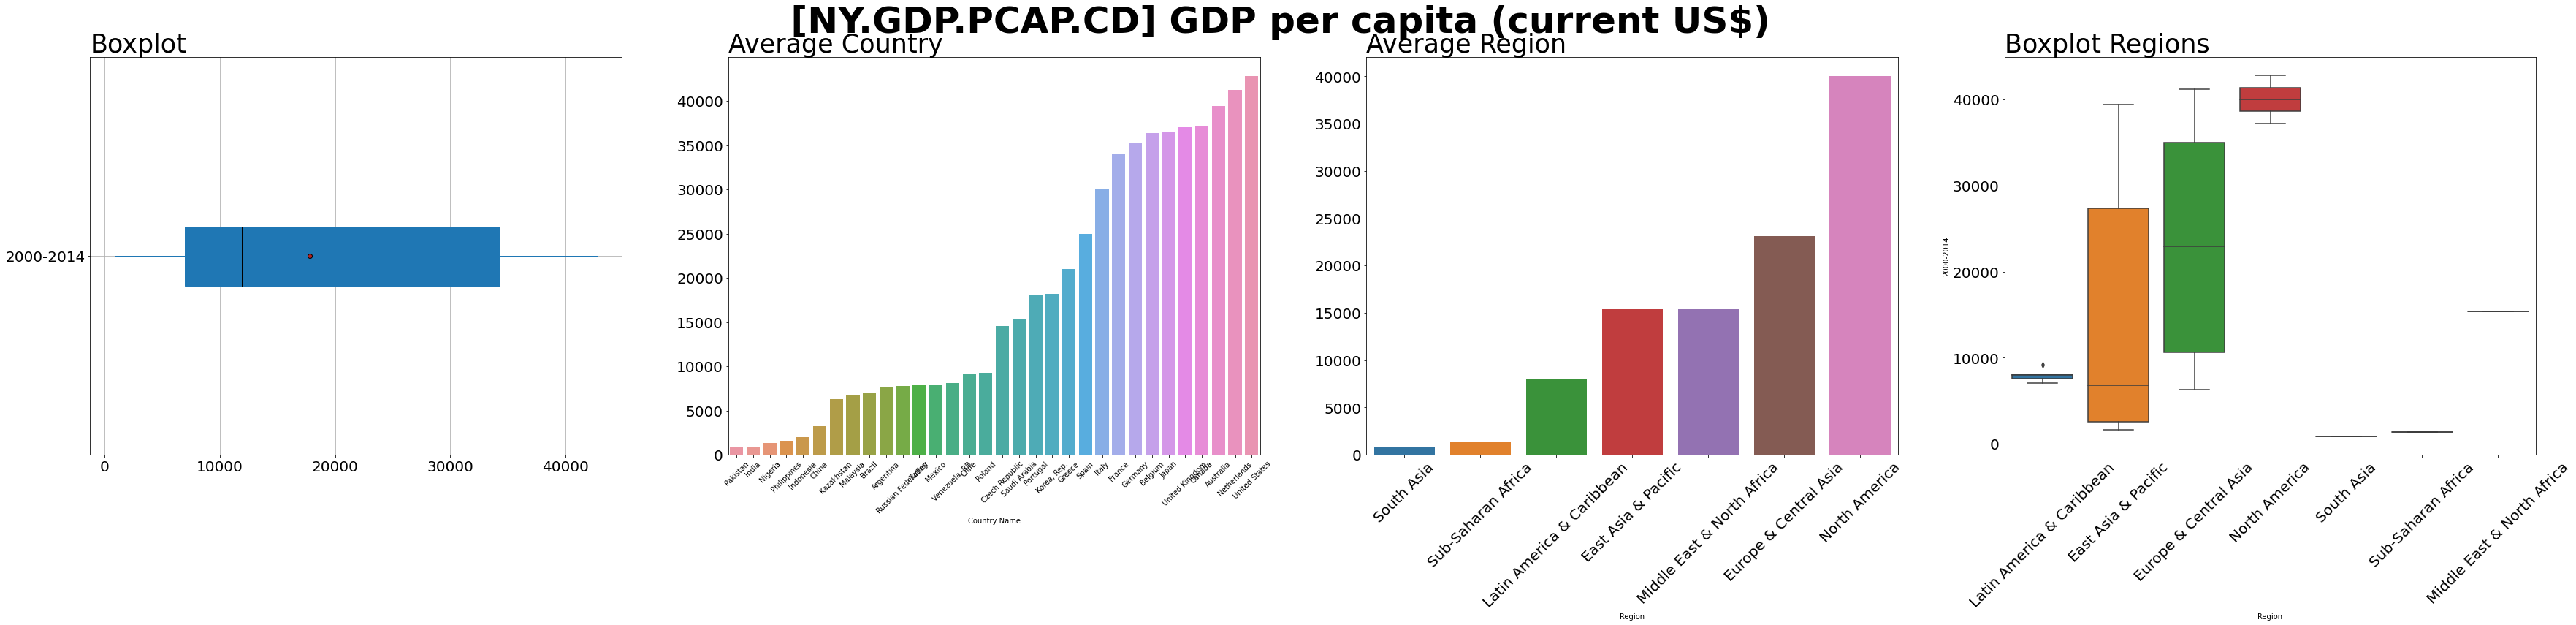

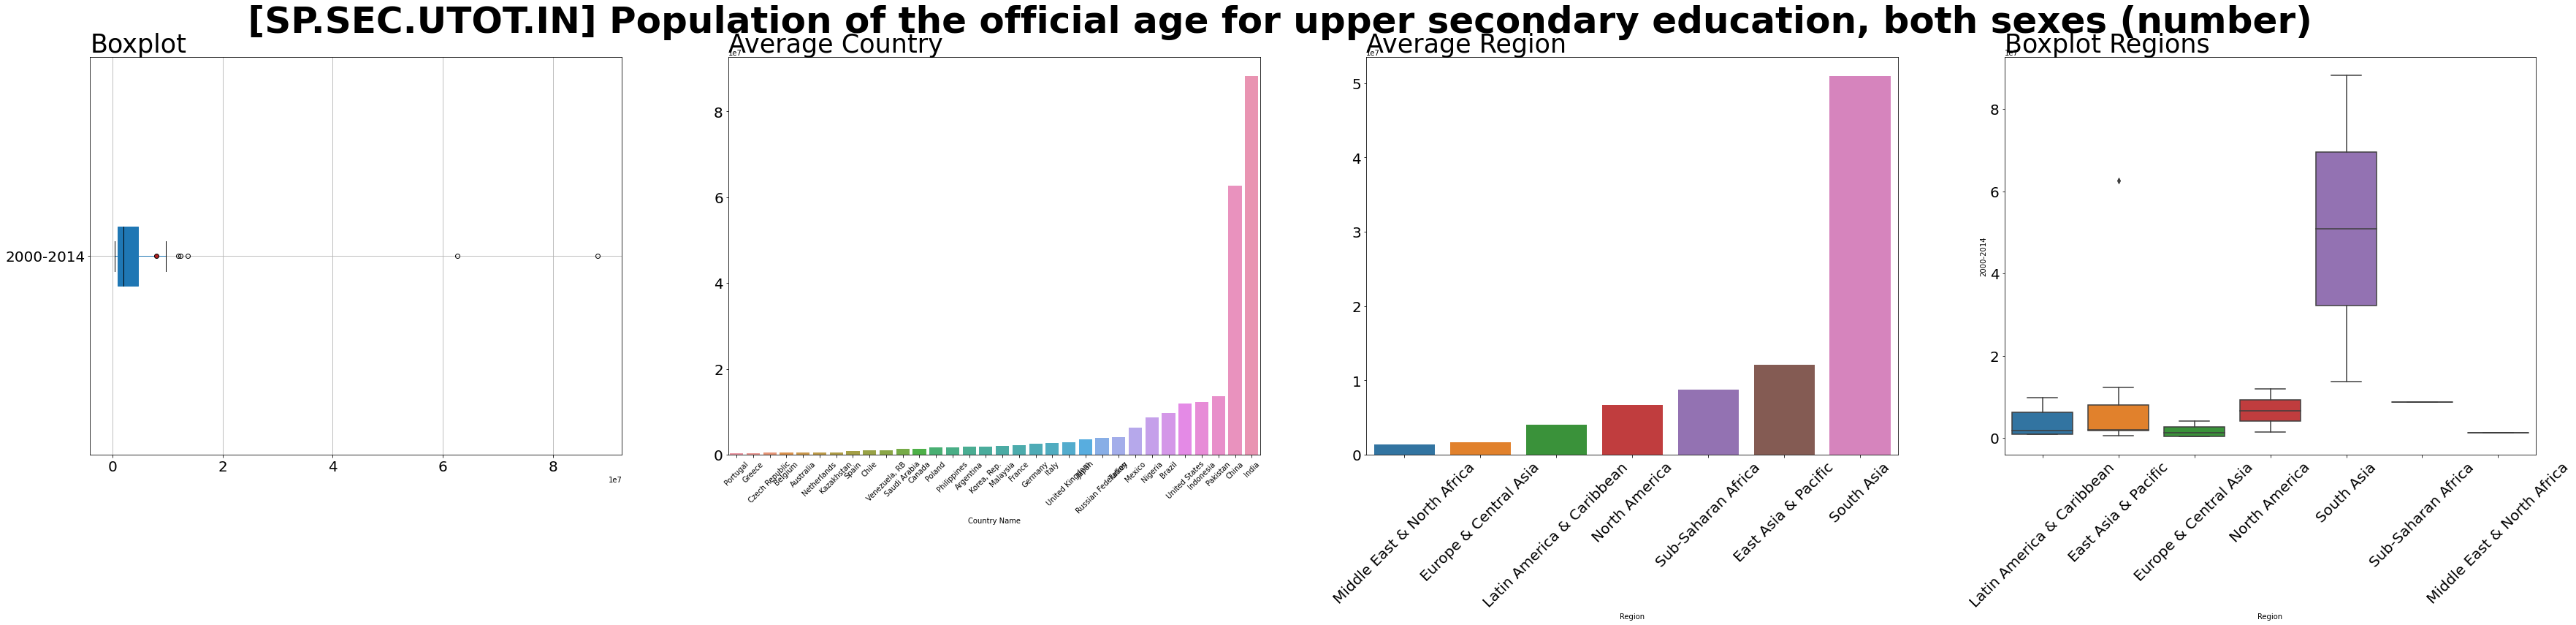

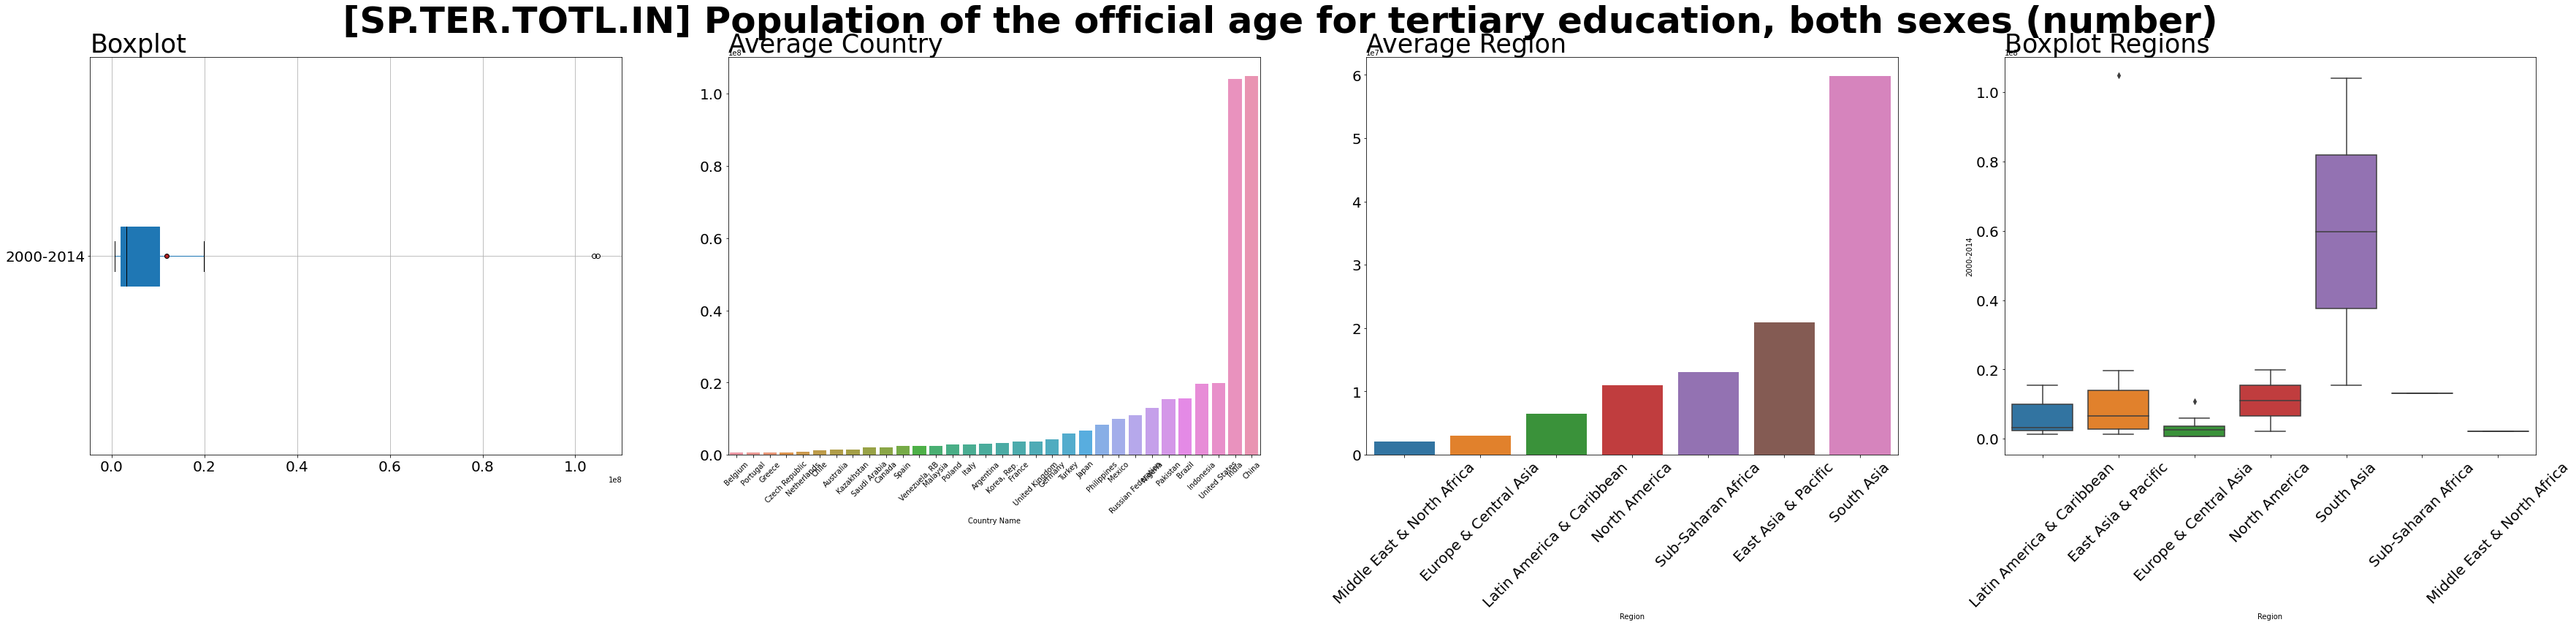

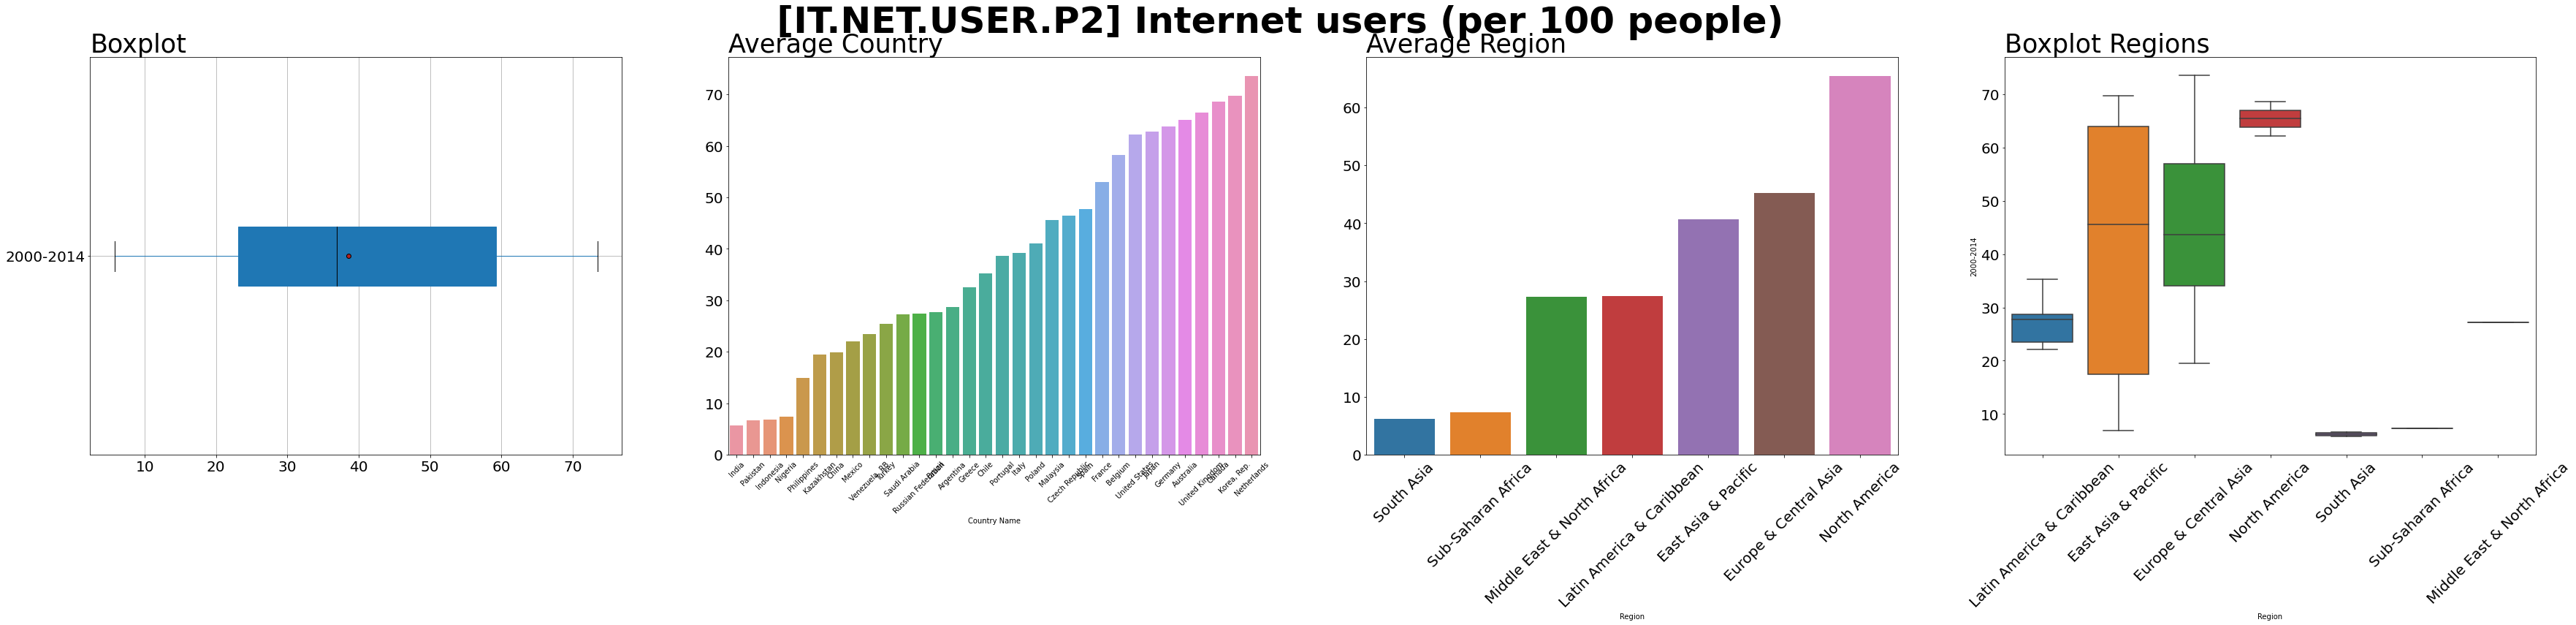

In [74]:
# Analysing orders of magnitude for each indicator
for indicateur in INDIC_SEL:
    plt.figure(figsize = (60, 10))
    
    data_plot = data.loc[data['Indicator Code'] == indicateur, ['Country Name', '2000-2014', 'Region', 'Indicator Name', 'Indicator Code']]
    
    indicateur_nom = data_plot["Indicator Name"].iloc[0]
    indicateur_code = data_plot["Indicator Code"].iloc[0]
    
    plt.suptitle(t = " [" + indicateur_code + "] "+indicateur_nom, weight = 'bold', fontsize=50)

    plt.subplot(1, 4, 1)
    plt.title(label= 'Boxplot', loc = 'left', fontsize=35)
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    data_plot.boxplot(column="2000-2014", showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    plt.subplot(1, 4, 2)
    plt.title(label= 'Average Country', loc = 'left', fontsize=35)
    data_plot_moy_pays = data_plot.groupby('Country Name')['2000-2014'].mean().sort_values()
    sns.barplot(x = data_plot_moy_pays.index, y = data_plot_moy_pays.values)
    plt.xticks(rotation = 45, fontsize=10)
    plt.yticks(fontsize=20)
    
    plt.subplot(1, 4, 3)
    plt.title(label= 'Average Region', loc = 'left', fontsize=35)
    data_plot_moy_reg = data_plot.groupby('Region')['2000-2014'].mean().sort_values()
    sns.barplot(x = data_plot_moy_reg.index, y = data_plot_moy_reg.values)
    plt.xticks(rotation = 45, fontsize=20)
    plt.yticks(fontsize=20)
    
    plt.subplot(1, 4, 4)
    plt.title(label= 'Boxplot Regions', loc = 'left', fontsize=35)
    sns.boxplot(x='Region', y= '2000-2014', data=data_plot)
    plt.xticks(rotation = 45,fontsize=20)
    plt.yticks(fontsize=20)
  
 
    plt.show()

In [75]:
# Displaying info related to the new dataset
data = data[data['Indicator Code'].isin(INDIC_SEL)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 26900 to 760987
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    128 non-null    object 
 1   Country Code    128 non-null    object 
 2   Indicator Name  128 non-null    object 
 3   Indicator Code  128 non-null    object 
 4   2000            125 non-null    float64
 5   2001            128 non-null    float64
 6   2002            127 non-null    float64
 7   2003            127 non-null    float64
 8   2004            127 non-null    float64
 9   2005            128 non-null    float64
 10  2006            126 non-null    float64
 11  2007            128 non-null    float64
 12  2008            128 non-null    float64
 13  2009            128 non-null    float64
 14  2010            126 non-null    float64
 15  2011            128 non-null    float64
 16  2012            128 non-null    float64
 17  2013            128 non-null

In [76]:
# Displaying NaNs of new dataset
data_taux = data[['Country Name','Country Code','Indicator Name','Indicator Code','2000-2014','Region']]
data_taux.isna().mean().mean()

0.0

# <a name="C10">Countries with high potential</a>  

In [77]:
# Reducing Data to the information necessary for this business problem
data = data[['Country Name','Country Code','Indicator Name','Indicator Code','2000-2014']]
data.shape

(128, 5)

In [78]:
# Creating a Pivot Table for Data
pivot = data.pivot_table('2000-2014', index=['Country Name'], columns=['Indicator Code','Indicator Name'])
pivot

Indicator Code                      IT.NET.USER.P2  \
Indicator Name     Internet users (per 100 people)   
Country Name                                         
Argentina                                28.709940   
Australia                                65.106719   
Belgium                                  58.246556   
Brazil                                   27.689788   
Canada                                   68.582117   
Chile                                    35.243400   
China                                    19.892074   
Czech Republic                           46.402200   
France                                   52.936765   
Germany                                  63.806994   
Greece                                   32.592173   
India                                     5.742614   
Indonesia                                 6.842936   
Italy                                    39.148460   
Japan                                    62.745245   
Kazakhstan                               19.537301   
Korea, Rep.                              69.771285   
Malaysia                                 45.608276   
Mexico                                   22.063770   
Netherlands                              73.518443   
Nigeria                                   7.352806   
Pakistan                                  6.650355   
Philippines                              14.989559   
Poland                                   41.027494   
Portugal                                 38.686738   
Russian Federation                       27.427379   
Saudi Arabia                             27.252310   
Spain                                    47.660831   
Turkey                                   25.391391   
United Kingdom                           66.435723   
United States                            62.212756   
Venezuela, RB                            23.446142   

Indicator Code                   NY.GDP.PCAP.CD  \
Indicator Name     GDP per capita (current US$)   
Country Name                                      
Argentina                           7591.259227   
Australia                          39410.438541   
Belgium                            36376.823618   
Brazil                              7037.507753   
Canada                             37219.187968   
Chile                               9222.968196   
China                               3194.358594   
Czech Republic                     14523.324830   
France                             33985.272015   
Germany                            35297.701106   
Greece                             20982.838208   
India                                899.597100   
Indonesia                           2012.291033   
Italy                              30103.848370   
Japan                              36569.774739   
Kazakhstan                          6288.984505   
Korea, Rep.                        18227.401341   
Malaysia                            6799.714699   
Mexico                              7981.135813   
Netherlands                        41231.857850   
Nigeria                             1351.708962   
Pakistan                             841.039562   
Philippines                         1609.822076   
Poland                              9291.493700   
Portugal                           18075.435896   
Russian Federation                  7786.197609   
Saudi Arabia                       15415.894487   
Spain                              24938.827521   
Turkey                              7829.701128   
United Kingdom                     37006.681370   
United States                      42793.659273   
Venezuela, RB                       8068.256975   

Indicator Code                                                                        SP.SEC.UTOT.IN  \
Indicator Name     Population of the official age for upper secondary education, both sexes (number)   
Country Name                                                                                           
Argentina  

In [79]:
# Adding new score variables relative to each category and an attractiveness score being the average of the category scores 
pivot['SE.SP'] = pivot[['SP.SEC.UTOT.IN','SP.TER.TOTL.IN']].mean(axis=1)
pivot['SCORE_DEMO']= pivot['SE.SP'] / pivot['SE.SP'].max()
pivot['SCORE_INFRA']= pivot['IT.NET.USER.P2'] / pivot['IT.NET.USER.P2'].max()
pivot['SCORE_BUDGET']= pivot['NY.GDP.PCAP.CD'] / pivot['NY.GDP.PCAP.CD'].max()
pivot['SCORE_ATTRAC']= (pivot['SCORE_DEMO'] + pivot['SCORE_INFRA'] + pivot['SCORE_BUDGET']) / 3
pivot

Indicator Code                      IT.NET.USER.P2  \
Indicator Name     Internet users (per 100 people)   
Country Name                                         
Argentina                                28.709940   
Australia                                65.106719   
Belgium                                  58.246556   
Brazil                                   27.689788   
Canada                                   68.582117   
Chile                                    35.243400   
China                                    19.892074   
Czech Republic                           46.402200   
France                                   52.936765   
Germany                                  63.806994   
Greece                                   32.592173   
India                                     5.742614   
Indonesia                                 6.842936   
Italy                                    39.148460   
Japan                                    62.745245   
Kazakhstan                               19.537301   
Korea, Rep.                              69.771285   
Malaysia                                 45.608276   
Mexico                                   22.063770   
Netherlands                              73.518443   
Nigeria                                   7.352806   
Pakistan                                  6.650355   
Philippines                              14.989559   
Poland                                   41.027494   
Portugal                                 38.686738   
Russian Federation                       27.427379   
Saudi Arabia                             27.252310   
Spain                                    47.660831   
Turkey                                   25.391391   
United Kingdom                           66.435723   
United States                            62.212756   
Venezuela, RB                            23.446142   

Indicator Code                   NY.GDP.PCAP.CD  \
Indicator Name     GDP per capita (current US$)   
Country Name                                      
Argentina                           7591.259227   
Australia                          39410.438541   
Belgium                            36376.823618   
Brazil                              7037.507753   
Canada                             37219.187968   
Chile                               9222.968196   
China                               3194.358594   
Czech Republic                     14523.324830   
France                             33985.272015   
Germany                            35297.701106   
Greece                             20982.838208   
India                                899.597100   
Indonesia                           2012.291033   
Italy                              30103.848370   
Japan                              36569.774739   
Kazakhstan                          6288.984505   
Korea, Rep.                        18227.401341   
Malaysia                            6799.714699   
Mexico                              7981.135813   
Netherlands                        41231.857850   
Nigeria                             1351.708962   
Pakistan                             841.039562   
Philippines                         1609.822076   
Poland                              9291.493700   
Portugal                           18075.435896   
Russian Federation                  7786.197609   
Saudi Arabia                       15415.894487   
Spain                              24938.827521   
Turkey                              7829.701128   
United Kingdom                     37006.681370   
United States                      42793.659273   
Venezuela, RB                       8068.256975   

Indicator Code                                                                        SP.SEC.UTOT.IN  \
Indicator Name     Population of the official age for upper secondary education, both sexes (number)   
Country Name                                                                                           
Argentina  

In [80]:
# Ranking the countries in order of highest attractivite score
pivot.sort_values('SCORE_ATTRAC', ascending=False)['SCORE_ATTRAC'].iloc[:15]

Country Name
United States     0.670565
Netherlands       0.657024
Canada            0.606969
Australia         0.605499
United Kingdom    0.600931
Japan             0.587123
Germany           0.576214
Belgium           0.549305
France            0.514773
Korea, Rep.       0.467403
Italy             0.421795
Spain             0.416179
China             0.405465
India             0.366378
Czech Republic    0.325494
Name: SCORE_ATTRAC, dtype: float64

In [81]:
# Listing the top 10 most "attractive" countries
PAYS_SEL = pivot["SCORE_ATTRAC"].sort_values(ascending=False)[:15].index
PAYS_SEL

Index(['United States', 'Netherlands', 'Canada', 'Australia', 'United Kingdom',
       'Japan', 'Germany', 'Belgium', 'France', 'Korea, Rep.', 'Italy',
       'Spain', 'China', 'India', 'Czech Republic'],
      dtype='object', name='Country Name')

In [82]:
# Retrieving the original file on the countries selected above.
data_or = data_or[data_or['Country Name'].isin(PAYS_SEL)]

In [83]:
# Listing projection indicators to see how these 15 countries evolve.
INDIC_PROJ = [i for i in data_or['Indicator Code'] if i.startswith('PRJ')]

In [84]:
# Displaying projection indicators
data_proj = data_or[data_or['Indicator Code'].isin(INDIC_PROJ)]
data_proj[['Indicator Name', 'Indicator Code']].drop_duplicates('Indicator Code')

Indicator Name  \
131624                                                                      Wittgenstein Projection: Mean years of schooling. Age 0-19. Female   
131625                                                                        Wittgenstein Projection: Mean years of schooling. Age 0-19. Male   
131626                                                                       Wittgenstein Projection: Mean years of schooling. Age 0-19. Total   
131627                                                                       Wittgenstein Projection: Mean years of schooling. Age 15+. Female   
131628                                                                   Wittgenstein Projection: Mean Years of Schooling. Age 15+. Gender Gap   
131629                                                                         Wittgenstein Projection: Mean years of schooling. Age 15+. Male   
131630                                                                        Wittgenstein Projection: Mean years of schooling. Age 15+. Total   
131631                                                                     Wittgenstein Projection: Mean years of schooling. Age 15-19. Female   
131632                                                                       Wittgenstein Projection: Mean years of schooling. Age 15-19. Male   
131633                                                                      Wittgenstein Projection: Mean years of schooling. Age 15-19. Total   
131634                                                                     Wittgenstein Projection: Mean years of schooling. Age 20-24. Female   
131635                                                                       Wittgenstein Projection: Mean years of schooling. Age 20-24. Male   
131636                                                                      Wittgenstein Projection: Mean years of schooling. Age 20-24. Total   
131637                                                                     Wittgenstein Projection: Mean years of schooling. Age 20-39. Female   
131638                                                                       Wittgenstein Projection: Mean years of schooling. Age 20-39. Male   
131639                                                                      Wittgenstein Projection: Mean years of schooling. Age 20-39. Total   
131640                                                                     Wittgenstein Projection: Mean years of schooling. Age 20-64. Female   
131641                                                                       Wittgenstein Projection: Mean years of schooling. Age 20-64. Male   
131642                                                                      Wittgenstein Projection: Mean years of schooling. Age 20-64. Total   
131643                                                                       Wittgenstein Projection: Mean years of schooling. Age 25+. Female   
131644                                                                   Wittgenstein Projection: Mean Years of Schooling. Age 25+. Gender Gap   
131645                                                                         Wittgenstein Projection: Mean years of schooling. Age 25+. Male   
131646                                                                        Wittgenstein Projection: Mean years of schooling. Age 25+. Total   
131647                                                                     Wittgenstein Projection: Mean years of schooling. Age 25-29. Female   
131648                                                                       Wittgenstein Projection: Mean years of schooling. Age 25-29. Male   
131649                                                                      Wittgenstein Projection: Mean years of schooling. Age 25-29. Total   
131650                                                                     Wittgenstein Projection: Mean years of schooling. Age 40-64. Female   
131651                                  

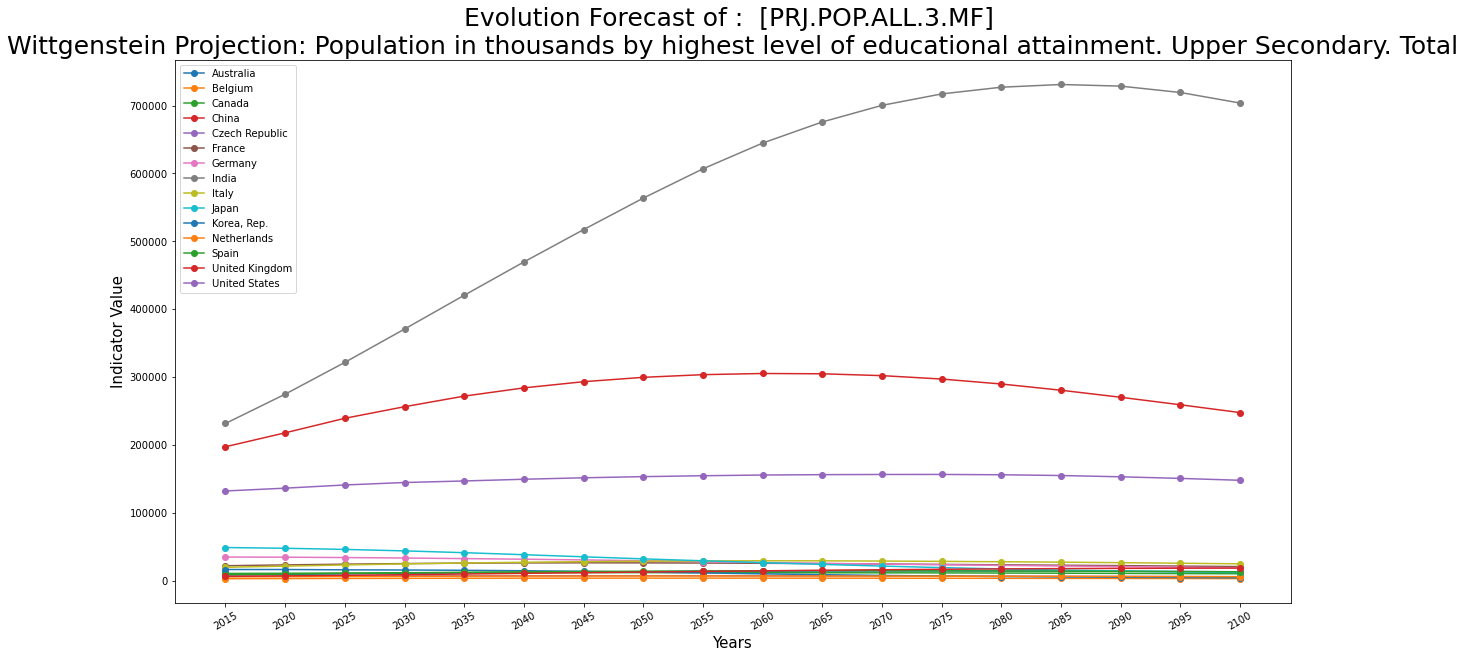

In [85]:
# Amongst the indicators, only the last one is of interest to our study but is limited to the lycee: Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total
# Analysing its evolution graph for the 15 countries
graphe_proj("PRJ.POP.ALL.3.MF")

The end